# Initialization 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
PlanarData2 = pd.read_csv('PlanarData2.csv', sep=',', index_col=0)
PlanarData2

,x1,x2,y
0,-0.077414,0.852602,1
1,0.431870,-0.872145,0
2,0.079165,0.840661,1
3,-0.630921,0.396287,1
4,-0.273100,-1.055061,0
...,...,...,...
395,0.657343,-0.740879,0
396,-0.863444,0.332227,0
397,-0.867811,0.302376,1
398,-0.271367,0.921162,0


In [3]:
X_train = PlanarData2.loc[:299,['x1','x2']].values
Y_train = PlanarData2.loc[:299,['y']].values

X_test = PlanarData2.loc[300:,['x1','x2']].values
Y_test = PlanarData2.loc[300:,['y']].values

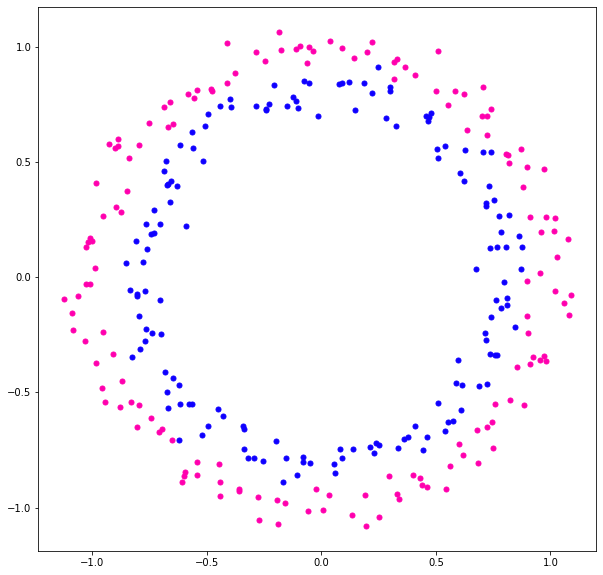

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='') 

In [5]:
def Model(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    kernel_initializer = params['kernel_initializer']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    threshold = params['threshold']
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(dims[1], 
                                    activation='relu', 
                                    kernel_initializer=kernel_initializer, 
                                    bias_initializer='zeros',
                                    input_shape=[dims[0]]))
    for dim in dims[2:-1]:
        model.add(tf.keras.layers.Dense(dim, 
                                        activation='relu', 
                                        kernel_initializer=kernel_initializer, 
                                        bias_initializer='zeros'))
    model.add(tf.keras.layers.Dense(dims[-1], 
                                    activation='sigmoid', 
                                    kernel_initializer=kernel_initializer, 
                                    bias_initializer='zeros'))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    metric = tf.keras.metrics.BinaryAccuracy(threshold=threshold)
    model.compile(loss='binary_crossentropy', metrics=[metric], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=1000,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=5000,
                                                 min_delta=0.001)
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback1, callback2])
    return model

In [6]:
model = Model({'dims': [X_train.shape[1], 10, 5, Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'kernel_initializer': 'zeros',
               'epochs': 15000, 
               'learning_rate': 0.1,
               'batch_size': X_train.shape[0],
               'threshold': 0.5})

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples
Epoch 1/15000
300/300 [==============================] - 0s 749us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4/15000
300/300 [========

Epoch 67/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 68/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 69/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 70/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 71/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 72/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 73/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 74/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 75/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binar

Epoch 139/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 140/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 141/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 142/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 143/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 144/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 145/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 146/15000
300/300 [==============================] - 0s 5us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 147/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931

Epoch 211/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 212/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 213/15000
300/300 [==============================] - 0s 5us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 214/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 215/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 216/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 217/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 218/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 219/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 

Epoch 283/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 284/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 285/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 286/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 287/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 288/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 289/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 290/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 291/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6

Epoch 355/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 356/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 357/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 358/15000
300/300 [==============================] - 0s 21us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 359/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 360/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 361/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 362/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 363/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.

Epoch 427/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 428/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 429/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 430/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 431/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 432/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 433/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 434/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 435/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6

Epoch 499/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 500/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 501/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 502/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 503/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 504/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 505/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 506/15000
300/300 [==============================] - 0s 5us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 507/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931

Epoch 571/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 572/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 573/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 574/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 575/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 576/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 577/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 578/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 579/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 

Epoch 643/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 644/15000
300/300 [==============================] - 0s 27us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 645/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 646/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 647/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 648/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 649/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 650/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 651/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.69

Epoch 715/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 716/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 717/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 718/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 719/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 720/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 721/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 722/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 723/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931

Epoch 787/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 788/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 789/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 790/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 791/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 792/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 793/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 794/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 795/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.

Epoch 859/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 860/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 861/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 862/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 863/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 864/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 865/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 866/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 867/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.69

Epoch 931/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 932/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 933/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 934/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 935/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 936/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 937/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 938/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 939/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.69

Epoch 1003/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1004/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1005/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1006/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1007/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1008/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1009/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1010/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1011/15000
300/300 [==============================] - 0s 6us/sample -

300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1075/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1076/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1077/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1078/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1079/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1080/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1081/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1082/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - bin

Epoch 1146/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1147/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1148/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1149/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1150/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1151/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1152/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1153/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1154/15000
300/300 [==============================] - 0s 14us/sample - l

300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1218/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1219/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1220/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1221/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1222/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1223/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1224/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1225/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - bina

Epoch 1289/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1290/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1291/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1292/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1293/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1294/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1295/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1296/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1297/15000
300/300 [==============================] - 0s 13us/sample -

Epoch 1360/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1361/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1362/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1363/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1364/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1365/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1366/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1367/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1368/15000
300/300 [==============================] - 0s 8us/sample - los

300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1432/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1433/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1434/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1435/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1436/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1437/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1438/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1439/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - bi

300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1503/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1504/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1505/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1506/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1507/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1508/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1509/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1510/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 -

Epoch 1574/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1575/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1576/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1577/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1578/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1579/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1580/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1581/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1582/15000
300/300 [==============================] - 0s 6us/sample - loss

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1646/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1647/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1648/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1649/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1650/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1651/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1652/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1653/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - bina

Epoch 1717/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1718/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1719/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1720/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1721/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1722/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1723/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1724/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1725/15000
300/300 [==============================] - 0s 10us/sample - lo

300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1789/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1790/15000
300/300 [==============================] - 0s 18us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1791/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1792/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1793/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1794/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1795/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1796/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - 

Epoch 1860/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1861/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1862/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1863/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1864/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1865/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1866/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1867/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1868/15000
300/300 [==============================] - 0s 9us/sample - loss

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1932/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1933/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1934/15000
300/300 [==============================] - 0s 25us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1935/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1936/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1937/15000
300/300 [==============================] - 0s 18us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1938/15000
300/300 [==============================] - 0s 18us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 1939/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - b

Epoch 2003/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2004/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2005/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2006/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2007/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2008/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2009/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2010/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2011/15000
300/300 [==============================] - 0s 7us/sample - loss

Epoch 2075/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2076/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2077/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2078/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2079/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2080/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2081/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2082/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2083/15000
300/300 [==============================] - 0s 6us/sample - los

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2147/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2148/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2149/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2150/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2151/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2152/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2153/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2154/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binar

Epoch 2218/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2219/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2220/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2221/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2222/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2223/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2224/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2225/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2226/15000
300/300 [==============================] - 0s 12us/sample - lo

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2290/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2291/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2292/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2293/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2294/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2295/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2296/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2297/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary

Epoch 2361/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2362/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2363/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2364/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2365/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2366/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2367/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2368/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2369/15000
300/300 [==============================] - 0s 10us/sample - 

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2433/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2434/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2435/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2436/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2437/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2438/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2439/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2440/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binar

Epoch 2504/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2505/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2506/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2507/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2508/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2509/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2510/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2511/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2512/15000
300/300 [==============================] - 0s 7us/sample - lo

Epoch 2576/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2577/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2578/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2579/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2580/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2581/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2582/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2583/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2584/15000
300/300 [==============================] - 0s 7us/sample - lo

Epoch 2647/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2648/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2649/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2650/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2651/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2652/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2653/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2654/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2655/15000
300/300 [==============================] - 0s 11us/sample 

Epoch 2718/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2719/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2720/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2721/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2722/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2723/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2724/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2725/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2726/15000
300/300 [==============================] - 0s 7us/sample - 

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2790/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2791/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2792/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2793/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2794/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2795/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2796/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2797/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binar

Epoch 2861/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2862/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2863/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2864/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2865/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2866/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2867/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2868/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2869/15000
300/300 [==============================] - 0s 7us/sample - los

Epoch 2933/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2934/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2935/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2936/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2937/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2938/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2939/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2940/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2941/15000
300/300 [==============================] - 0s 9us/sample - los

Epoch 3004/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3005/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3006/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3007/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3008/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3009/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3010/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3011/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3012/15000
300/300 [==============================] - 0s 9us/sample - l

300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3076/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3077/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3078/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3079/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3080/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3081/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3082/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3083/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - b

Epoch 3147/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3148/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3149/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3150/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3151/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3152/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3153/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3154/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3155/15000
300/300 [==============================] - 0s 9us/sample - los

300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3219/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3220/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3221/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3222/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3223/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3224/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3225/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3226/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - bin

Epoch 3290/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3291/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3292/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3293/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3294/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3295/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3296/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3297/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3298/15000
300/300 [==============================] - 0s 8us/sample - loss

300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3362/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3363/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3364/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3365/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3366/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3367/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3368/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3369/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - bina

Epoch 3433/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3434/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3435/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3436/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3437/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3438/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3439/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3440/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3441/15000
300/300 [==============================] - 0s 6us/sample - lo

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3505/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3506/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3507/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3508/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3509/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3510/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3511/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3512/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - b

Epoch 3576/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3577/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3578/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3579/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3580/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3581/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3582/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3583/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3584/15000
300/300 [==============================] - 0s 8us/sample - l

300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3648/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3649/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3650/15000
300/300 [==============================] - 0s 5us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3651/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3652/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3653/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3654/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3655/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binar

Epoch 3719/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3720/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3721/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3722/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3723/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3724/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3725/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3726/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3727/15000
300/300 [==============================] - 0s 7us/sample - los

Epoch 3791/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3792/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3793/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3794/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3795/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3796/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3797/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3798/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3799/15000
300/300 [==============================] - 0s 9us/sample - loss

Epoch 3862/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3863/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3864/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3865/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3866/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3867/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3868/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3869/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3870/15000
300/300 [==============================] - 0s 8us/sample - los

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3934/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3935/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3936/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3937/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3938/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3939/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3940/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 3941/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - bina

Epoch 4005/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4006/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4007/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4008/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4009/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4010/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4011/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4012/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4013/15000
300/300 [==============================] - 0s 9us/sample - los

Epoch 4077/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4078/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4079/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4080/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4081/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4082/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4083/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4084/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4085/15000
300/300 [==============================] - 0s 11us/sample - lo

Epoch 4148/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4149/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4150/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4151/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4152/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4153/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4154/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4155/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4156/15000
300/300 [==============================] - 0s 8us/sample - lo

300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4220/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4221/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4222/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4223/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4224/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4225/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4226/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4227/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - bi

Epoch 4290/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4291/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4292/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4293/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4294/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4295/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4296/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4297/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4298/15000
300/300 [==============================] - 0s 12us/sample - los

300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4362/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4363/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4364/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4365/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4366/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4367/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4368/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4369/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - bin

Epoch 4433/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4434/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4435/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4436/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4437/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4438/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4439/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4440/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4441/15000
300/300 [==============================] - 0s 6us/sample - l

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4505/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4506/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4507/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4508/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4509/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4510/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4511/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4512/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binar

300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4576/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4577/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4578/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4579/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4580/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4581/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4582/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4583/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - bi

Epoch 4647/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4648/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4649/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4650/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4651/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4652/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4653/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4654/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4655/15000
300/300 [==============================] - 0s 9us/sample -

Epoch 4718/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4719/15000
300/300 [==============================] - 0s 23us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4720/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4721/15000
300/300 [==============================] - 0s 31us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4722/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4723/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4724/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4725/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4726/15000
300/300 [==============================] - 0s 11us/sample 

Epoch 4789/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4790/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4791/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4792/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4793/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4794/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4795/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4796/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4797/15000
300/300 [==============================] - 0s 11us/sample - 

Epoch 4860/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4861/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4862/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4863/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4864/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4865/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4866/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4867/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4868/15000
300/300 [==============================] - 0s 9us/sample - 

Epoch 4931/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4932/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4933/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4934/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4935/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4936/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4937/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4938/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4939/15000
300/300 [==============================] - 0s 9us/sample -

In [7]:
model.evaluate(X_train, Y_train)

300/300 [==============================] - 0s 277us/sample - loss: 0.6931 - binary_accuracy: 0.5000


[0.6931471824645996, 0.5]

In [8]:
model.evaluate(X_test, Y_test)

100/100 [==============================] - 0s 78us/sample - loss: 0.6931 - binary_accuracy: 0.5000


[0.6931471824645996, 0.5]

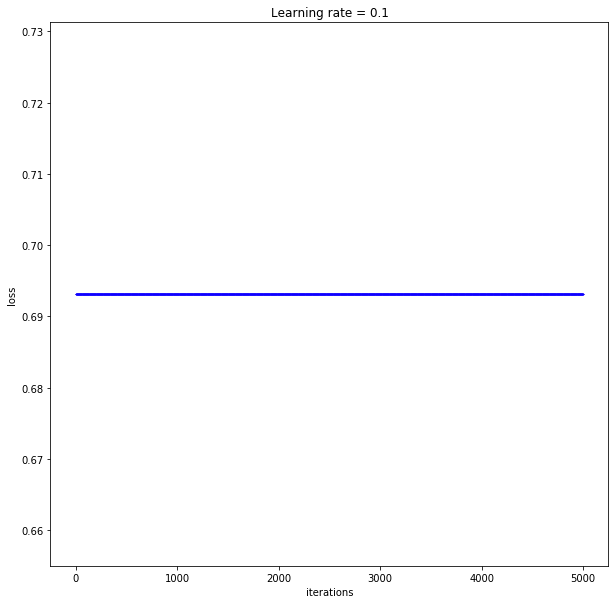

In [9]:
loss = model.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.1')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

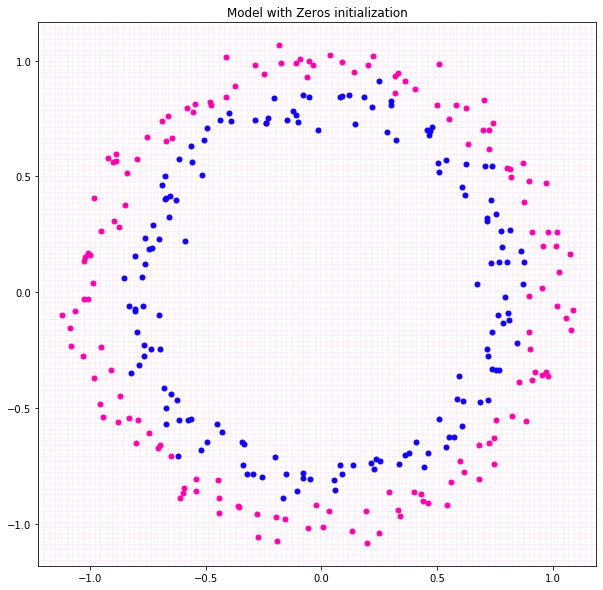

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_title('Model with Zeros initialization') 

u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

-----

In [11]:
model = Model({'dims': [X_train.shape[1], 10, 5, Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'kernel_initializer': 'random_normal',
               'epochs': 15000, 
               'learning_rate': 0.1,
               'batch_size': X_train.shape[0],
               'threshold': 0.5})

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples
Epoch 1/15000
300/300 [==============================] - 0s 661us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.4933
Epoch 3/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 4/15000
300/300 [======

Epoch 67/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 68/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 69/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 70/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 71/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5433
Epoch 72/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5467
Epoch 73/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5467
Epoch 74/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5433
Epoch 75/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - bi

Epoch 139/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5533
Epoch 140/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5533
Epoch 141/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5567
Epoch 142/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 143/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 144/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 145/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 146/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 147/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.69

Epoch 211/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 212/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 213/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 214/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 215/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 216/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 217/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 218/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 219/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6

Epoch 283/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 284/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 285/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 286/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 287/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 288/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 289/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 290/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 291/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.693

Epoch 355/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 356/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 357/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 358/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 359/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 360/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 361/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 362/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 363/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.

Epoch 427/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5700
Epoch 428/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5700
Epoch 429/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5700
Epoch 430/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5700
Epoch 431/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5700
Epoch 432/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5700
Epoch 433/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5700
Epoch 434/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5733
Epoch 435/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931

Epoch 499/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 500/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5733
Epoch 501/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 502/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 503/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 504/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 505/15000
300/300 [==============================] - 0s 29us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 506/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 507/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.

Epoch 571/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 572/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 573/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 574/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 575/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 576/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 577/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 578/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 579/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931

Epoch 643/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5833
Epoch 644/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 645/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 646/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 647/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 648/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 649/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5833
Epoch 650/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5833
Epoch 651/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.693

Epoch 715/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 716/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 717/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5800
Epoch 718/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 719/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 720/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 721/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 722/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5767
Epoch 723/15000
300/300 [==============================] - 0s 14us/sample - loss:

Epoch 787/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 788/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 789/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 790/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 791/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 792/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 793/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5600
Epoch 794/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5633
Epoch 795/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.69

Epoch 859/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5467
Epoch 860/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5467
Epoch 861/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5467
Epoch 862/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5467
Epoch 863/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5467
Epoch 864/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5467
Epoch 865/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5467
Epoch 866/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5467
Epoch 867/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.

Epoch 931/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 932/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 933/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 934/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 935/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 936/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 937/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 938/15000
300/300 [==============================] - 0s 21us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 939/15000
300/300 [==============================] - 0s 7us/sample - loss: 

Epoch 1003/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1004/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1005/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1006/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1007/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1008/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1009/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1010/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1011/15000
300/300 [==============================] - 0s 10us/sample - 

300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1075/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1076/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1077/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1078/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1079/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1080/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1081/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1082/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binar

300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1146/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1147/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1148/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1149/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1150/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1151/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1152/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1153/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - bi

300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1217/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1218/15000
300/300 [==============================] - 0s 24us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1219/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1220/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1221/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1222/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1223/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1224/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - bi

300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1288/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1289/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1290/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1291/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1292/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1293/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1294/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1295/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - b

Epoch 1359/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1360/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1361/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1362/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1363/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1364/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1365/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1366/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1367/15000
300/300 [==============================] - 0s 8us/sample -

Epoch 1430/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1431/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1432/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1433/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1434/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1435/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1436/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1437/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1438/15000
300/300 [==============================] - 0s 15us/sample - lo

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1502/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1503/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1504/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1505/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1506/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1507/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1508/15000
300/300 [==============================] - 0s 29us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1509/15000
300/300 [==============================] - 0s 37us/sample - loss: 0.6931 - bin

300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1573/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1574/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1575/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1576/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1577/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1578/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1579/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1580/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - 

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1644/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1645/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1646/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1647/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1648/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1649/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1650/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1651/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - bina

300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1715/15000
300/300 [==============================] - 0s 26us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1716/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1717/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1718/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1719/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1720/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1721/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1722/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - b

300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1786/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1787/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1788/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1789/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1790/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1791/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1792/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1793/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - bin

Epoch 1857/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1858/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1859/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1860/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1861/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1862/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1863/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1864/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1865/15000
300/300 [==============================] - 0s 7us/sample - los

300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1929/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1930/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1931/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1932/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1933/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1934/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1935/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5400
Epoch 1936/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binar

Epoch 2000/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2001/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2002/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2003/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2004/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2005/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2006/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2007/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2008/15000
300/300 [==============================] - 0s 7us/sample - los

Epoch 2072/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2073/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2074/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2075/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2076/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2077/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2078/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2079/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2080/15000
300/300 [==============================] - 0s 7us/sample - loss

Epoch 2144/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2145/15000
300/300 [==============================] - 0s 5us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2146/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2147/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2148/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2149/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2150/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2151/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2152/15000
300/300 [==============================] - 0s 7us/sample - los

Epoch 2216/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2217/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2218/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2219/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2220/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2221/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2222/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2223/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2224/15000
300/300 [==============================] - 0s 8us/sample - loss

Epoch 2288/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2289/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2290/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2291/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2292/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2293/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2294/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2295/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2296/15000
300/300 [==============================] - 0s 6us/sample - lo

Epoch 2359/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2360/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2361/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2362/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2363/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2364/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2365/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2366/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2367/15000
300/300 [==============================] - 0s 10us/sample - 

300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2431/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2432/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2433/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2434/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2435/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2436/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2437/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2438/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binar

Epoch 2502/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2503/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2504/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2505/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2506/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2507/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2508/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2509/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2510/15000
300/300 [==============================] - 0s 9us/sample - los

300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2574/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2575/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2576/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2577/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2578/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2579/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2580/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2581/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - bi

Epoch 2645/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2646/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2647/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2648/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2649/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2650/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2651/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2652/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2653/15000
300/300 [==============================] - 0s 7us/sample - l

300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2717/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2718/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2719/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2720/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2721/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2722/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2723/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2724/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binar

Epoch 2788/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2789/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2790/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2791/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2792/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2793/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2794/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2795/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2796/15000
300/300 [==============================] - 0s 9us/sample - lo

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2860/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2861/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2862/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2863/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2864/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2865/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2866/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2867/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - bina

Epoch 2931/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2932/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2933/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2934/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2935/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2936/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2937/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2938/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 2939/15000
300/300 [==============================] - 0s 12us/sample - l

Epoch 3003/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3004/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3005/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3006/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3007/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3008/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3009/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3010/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3011/15000
300/300 [==============================] - 0s 6us/sample - los

Epoch 3075/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3076/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3077/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3078/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3079/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3080/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3081/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3082/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3083/15000
300/300 [==============================] - 0s 6us/sample - los

300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3147/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3148/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3149/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3150/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3151/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3152/15000
300/300 [==============================] - 0s 18us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3153/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3154/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 

Epoch 3218/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3219/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3220/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3221/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3222/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3223/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3224/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3225/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3226/15000
300/300 [==============================] - 0s 8us/sample - loss

Epoch 3290/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3291/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3292/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3293/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3294/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3295/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3296/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3297/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3298/15000
300/300 [==============================] - 0s 16us/sample - 

300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3362/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3363/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3364/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3365/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3366/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3367/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3368/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3369/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binar

300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3433/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3434/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3435/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3436/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3437/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3438/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3439/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3440/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - bin

Epoch 3504/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3505/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3506/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3507/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3508/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3509/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3510/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3511/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3512/15000
300/300 [==============================] - 0s 7us/sample - los

300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3576/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3577/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3578/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3579/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3580/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3581/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3582/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3583/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binar

Epoch 3647/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3648/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3649/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3650/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3651/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3652/15000
300/300 [==============================] - 0s 22us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3653/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3654/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3655/15000
300/300 [==============================] - 0s 22us/samp

Epoch 3718/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3719/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3720/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3721/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3722/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3723/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3724/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3725/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3726/15000
300/300 [==============================] - 0s 7us/sample - loss

300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3790/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3791/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3792/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3793/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3794/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3795/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3796/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3797/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binar

Epoch 3861/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3862/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3863/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3864/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3865/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3866/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3867/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3868/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3869/15000
300/300 [==============================] - 0s 8us/sample - los

300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3933/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3934/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3935/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3936/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3937/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3938/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3939/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 3940/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - bin

Epoch 4004/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4005/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4006/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4007/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4008/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4009/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4010/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4011/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4012/15000
300/300 [==============================] - 0s 7us/sample - 

300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4076/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4077/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4078/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4079/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4080/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4081/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4082/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4083/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - bina

Epoch 4147/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4148/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4149/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4150/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4151/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4152/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4153/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4154/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4155/15000
300/300 [==============================] - 0s 8us/sample -

Epoch 4218/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4219/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4220/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4221/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4222/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4223/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4224/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4225/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4226/15000
300/300 [==============================] - 0s 7us/sample -

Epoch 4289/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4290/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4291/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4292/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4293/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4294/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4295/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4296/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4297/15000
300/300 [==============================] - 0s 7us/sample 

Epoch 4360/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4361/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4362/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4363/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4364/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4365/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4366/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4367/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4368/15000
300/300 [==============================] - 0s 18us/sample -

Epoch 4431/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4432/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4433/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4434/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4435/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4436/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4437/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4438/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4439/15000
300/300 [==============================] - 0s 8us/sample - lo

Epoch 4502/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4503/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4504/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4505/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4506/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4507/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4508/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4509/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4510/15000
300/300 [==============================] - 0s 10us/sample - l

Epoch 4573/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4574/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4575/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4576/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4577/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4578/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4579/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4580/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4581/15000
300/300 [==============================] - 0s 12us/sample 

Epoch 4644/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4645/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4646/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4647/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4648/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4649/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4650/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4651/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4652/15000
300/300 [==============================] - 0s 13us/sample - 

300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4716/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4717/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4718/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4719/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4720/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4721/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4722/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4723/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary

Epoch 4787/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4788/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4789/15000
300/300 [==============================] - 0s 27us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4790/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4791/15000
300/300 [==============================] - 0s 27us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4792/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4793/15000
300/300 [==============================] - 0s 25us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4794/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4795/15000
300/300 [==============================] - 0s 30us/sampl

Epoch 4858/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4859/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4860/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4861/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4862/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4863/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4864/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4865/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4866/15000
300/300 [==============================] - 0s 10us/sample - l

Epoch 4929/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4930/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4931/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4932/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4933/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4934/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4935/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4936/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 4937/15000
300/300 [==============================] - 0s 17us/sample -

Epoch 5000/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6931 - binary_accuracy: 0.5367
Epoch 5001/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6931 - binary_accuracy: 0.5367


In [12]:
model.evaluate(X_train, Y_train)

300/300 [==============================] - 0s 244us/sample - loss: 0.6931 - binary_accuracy: 0.5367


[0.6930998301506043, 0.5366667]

In [13]:
model.evaluate(X_test, Y_test)

100/100 [==============================] - 0s 52us/sample - loss: 0.6931 - binary_accuracy: 0.5600


[0.6931018209457398, 0.56]

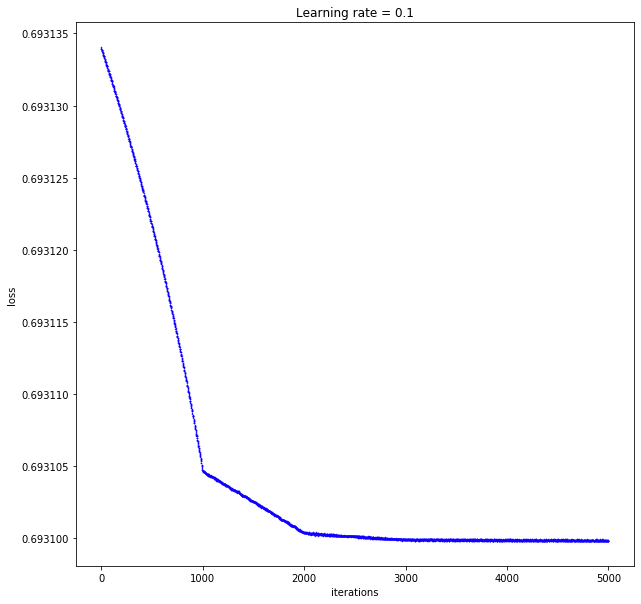

In [14]:
loss = model.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.1')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

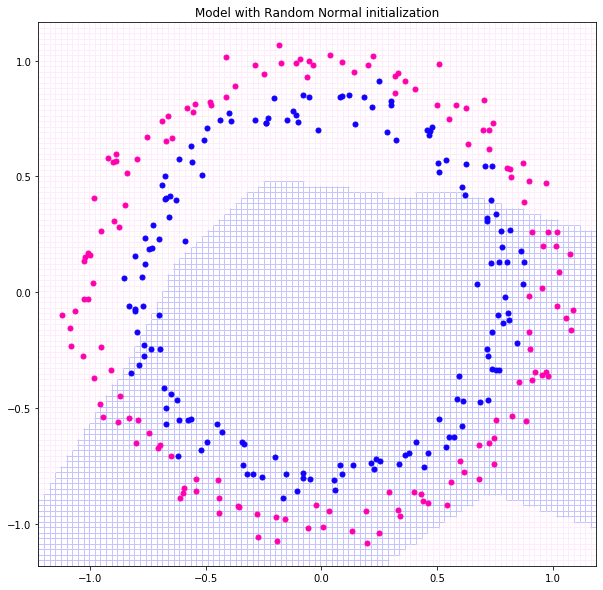

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_title('Model with Random Normal initialization') 

u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

-----

In [16]:
model = Model({'dims': [X_train.shape[1], 10, 5, Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'kernel_initializer': 'he_normal',
               'epochs': 15000, 
               'learning_rate': 0.1,
               'batch_size': X_train.shape[0],
               'threshold': 0.5})

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples
Epoch 1/15000
300/300 [==============================] - 0s 663us/sample - loss: 0.9108 - binary_accuracy: 0.5000
Epoch 2/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.8519 - binary_accuracy: 0.5067
Epoch 3/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.8070 - binary_accuracy: 0.5067
Epoch 4/15000
300/300 [=====

Epoch 67/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6666 - binary_accuracy: 0.5900
Epoch 68/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.6663 - binary_accuracy: 0.5933
Epoch 69/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6661 - binary_accuracy: 0.5933
Epoch 70/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6658 - binary_accuracy: 0.5967
Epoch 71/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.6656 - binary_accuracy: 0.5967
Epoch 72/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6653 - binary_accuracy: 0.6000
Epoch 73/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6650 - binary_accuracy: 0.6000
Epoch 74/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6648 - binary_accuracy: 0.6000
Epoch 75/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6645 -

Epoch 139/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6460 - binary_accuracy: 0.6433
Epoch 140/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6457 - binary_accuracy: 0.6433
Epoch 141/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.6454 - binary_accuracy: 0.6433
Epoch 142/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6450 - binary_accuracy: 0.6433
Epoch 143/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6447 - binary_accuracy: 0.6467
Epoch 144/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.6443 - binary_accuracy: 0.6500
Epoch 145/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.6439 - binary_accuracy: 0.6500
Epoch 146/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6436 - binary_accuracy: 0.6467
Epoch 147/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6

Epoch 211/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6159 - binary_accuracy: 0.7267
Epoch 212/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.6154 - binary_accuracy: 0.7267
Epoch 213/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.6149 - binary_accuracy: 0.7267
Epoch 214/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.6144 - binary_accuracy: 0.7267
Epoch 215/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6138 - binary_accuracy: 0.7267
Epoch 216/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6133 - binary_accuracy: 0.7267
Epoch 217/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.6128 - binary_accuracy: 0.7267
Epoch 218/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.6122 - binary_accuracy: 0.7267
Epoch 219/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.611

Epoch 283/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.5713 - binary_accuracy: 0.8567
Epoch 284/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.5706 - binary_accuracy: 0.8567
Epoch 285/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.5699 - binary_accuracy: 0.8600
Epoch 286/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.5691 - binary_accuracy: 0.8667
Epoch 287/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.5684 - binary_accuracy: 0.8700
Epoch 288/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.5676 - binary_accuracy: 0.8733
Epoch 289/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.5669 - binary_accuracy: 0.8733
Epoch 290/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.5661 - binary_accuracy: 0.8767
Epoch 291/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.56

Epoch 355/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.5093 - binary_accuracy: 0.9433
Epoch 356/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.5083 - binary_accuracy: 0.9467
Epoch 357/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.5072 - binary_accuracy: 0.9467
Epoch 358/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.5062 - binary_accuracy: 0.9467
Epoch 359/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.5051 - binary_accuracy: 0.9467
Epoch 360/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.5041 - binary_accuracy: 0.9467
Epoch 361/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.5030 - binary_accuracy: 0.9467
Epoch 362/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.5020 - binary_accuracy: 0.9500
Epoch 363/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.500

Epoch 427/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.4307 - binary_accuracy: 0.9700
Epoch 428/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.4296 - binary_accuracy: 0.9700
Epoch 429/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.4285 - binary_accuracy: 0.9733
Epoch 430/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.4274 - binary_accuracy: 0.9733
Epoch 431/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.4263 - binary_accuracy: 0.9733
Epoch 432/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.4252 - binary_accuracy: 0.9733
Epoch 433/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.4241 - binary_accuracy: 0.9733
Epoch 434/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.4230 - binary_accuracy: 0.9733
Epoch 435/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.4219

Epoch 499/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.3417 - binary_accuracy: 0.9900
Epoch 500/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.3406 - binary_accuracy: 0.9900
Epoch 501/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.3394 - binary_accuracy: 0.9900
Epoch 502/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.3383 - binary_accuracy: 0.9900
Epoch 503/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.3372 - binary_accuracy: 0.9900
Epoch 504/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.3361 - binary_accuracy: 0.9900
Epoch 505/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.3350 - binary_accuracy: 0.9900
Epoch 506/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.3339 - binary_accuracy: 0.9900
Epoch 507/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.332

Epoch 571/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.2675 - binary_accuracy: 0.9867
Epoch 572/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.2666 - binary_accuracy: 0.9867
Epoch 573/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.2657 - binary_accuracy: 0.9867
Epoch 574/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.2648 - binary_accuracy: 0.9867
Epoch 575/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.2639 - binary_accuracy: 0.9867
Epoch 576/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.2630 - binary_accuracy: 0.9867
Epoch 577/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.2621 - binary_accuracy: 0.9867
Epoch 578/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.2612 - binary_accuracy: 0.9867
Epoch 579/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.260

Epoch 643/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.2132 - binary_accuracy: 0.9867
Epoch 644/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.2126 - binary_accuracy: 0.9867
Epoch 645/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.2120 - binary_accuracy: 0.9867
Epoch 646/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.2114 - binary_accuracy: 0.9867
Epoch 647/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.2108 - binary_accuracy: 0.9867
Epoch 648/15000
300/300 [==============================] - 0s 5us/sample - loss: 0.2102 - binary_accuracy: 0.9867
Epoch 649/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.2096 - binary_accuracy: 0.9867
Epoch 650/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.2090 - binary_accuracy: 0.9867
Epoch 651/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.2084

Epoch 715/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.1751 - binary_accuracy: 0.9867
Epoch 716/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.1747 - binary_accuracy: 0.9867
Epoch 717/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.1742 - binary_accuracy: 0.9867
Epoch 718/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.1738 - binary_accuracy: 0.9867
Epoch 719/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.1734 - binary_accuracy: 0.9867
Epoch 720/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.1729 - binary_accuracy: 0.9867
Epoch 721/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.1725 - binary_accuracy: 0.9867
Epoch 722/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.1721 - binary_accuracy: 0.9867
Epoch 723/15000
300/300 [==============================] - 0s 7us/sample - loss: 0

Epoch 787/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1478 - binary_accuracy: 0.9867
Epoch 788/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1475 - binary_accuracy: 0.9867
Epoch 789/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1471 - binary_accuracy: 0.9867
Epoch 790/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.1468 - binary_accuracy: 0.9867
Epoch 791/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.1465 - binary_accuracy: 0.9867
Epoch 792/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1462 - binary_accuracy: 0.9867
Epoch 793/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1459 - binary_accuracy: 0.9867
Epoch 794/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.1455 - binary_accuracy: 0.9867
Epoch 795/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.145

Epoch 859/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.1278 - binary_accuracy: 0.9867
Epoch 860/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1275 - binary_accuracy: 0.9867
Epoch 861/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.1273 - binary_accuracy: 0.9867
Epoch 862/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.1270 - binary_accuracy: 0.9867
Epoch 863/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.1268 - binary_accuracy: 0.9867
Epoch 864/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.1266 - binary_accuracy: 0.9867
Epoch 865/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1263 - binary_accuracy: 0.9867
Epoch 866/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1261 - binary_accuracy: 0.9867
Epoch 867/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.125

Epoch 931/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.1129 - binary_accuracy: 0.9867
Epoch 932/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.1127 - binary_accuracy: 0.9867
Epoch 933/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1125 - binary_accuracy: 0.9867
Epoch 934/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1123 - binary_accuracy: 0.9867
Epoch 935/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.1122 - binary_accuracy: 0.9867
Epoch 936/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.1120 - binary_accuracy: 0.9867
Epoch 937/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.1118 - binary_accuracy: 0.9867
Epoch 938/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1116 - binary_accuracy: 0.9867
Epoch 939/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.111

Epoch 1003/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.1015 - binary_accuracy: 0.9867
Epoch 1004/15000
300/300 [==============================] - 0s 35us/sample - loss: 0.1013 - binary_accuracy: 0.9867
Epoch 1005/15000
300/300 [==============================] - 0s 38us/sample - loss: 0.1012 - binary_accuracy: 0.9867
Epoch 1006/15000
300/300 [==============================] - 0s 33us/sample - loss: 0.1011 - binary_accuracy: 0.9867
Epoch 1007/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.1009 - binary_accuracy: 0.9867
Epoch 1008/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.1008 - binary_accuracy: 0.9867
Epoch 1009/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.1006 - binary_accuracy: 0.9867
Epoch 1010/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.1005 - binary_accuracy: 0.9867
Epoch 1011/15000
300/300 [==============================] - 0s 9us/sample 

Epoch 1075/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0925 - binary_accuracy: 0.9867
Epoch 1076/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0924 - binary_accuracy: 0.9867
Epoch 1077/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0922 - binary_accuracy: 0.9867
Epoch 1078/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0921 - binary_accuracy: 0.9867
Epoch 1079/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0920 - binary_accuracy: 0.9867
Epoch 1080/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0919 - binary_accuracy: 0.9867
Epoch 1081/15000
300/300 [==============================] - 0s 23us/sample - loss: 0.0918 - binary_accuracy: 0.9867
Epoch 1082/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0917 - binary_accuracy: 0.9867
Epoch 1083/15000
300/300 [==============================] - 0s 11us/sample - l

300/300 [==============================] - 0s 7us/sample - loss: 0.0852 - binary_accuracy: 0.9867
Epoch 1147/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0851 - binary_accuracy: 0.9867
Epoch 1148/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0850 - binary_accuracy: 0.9867
Epoch 1149/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0849 - binary_accuracy: 0.9867
Epoch 1150/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0848 - binary_accuracy: 0.9867
Epoch 1151/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0847 - binary_accuracy: 0.9867
Epoch 1152/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0846 - binary_accuracy: 0.9867
Epoch 1153/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0846 - binary_accuracy: 0.9867
Epoch 1154/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0845 - bina

Epoch 1218/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0791 - binary_accuracy: 0.9867
Epoch 1219/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0791 - binary_accuracy: 0.9867
Epoch 1220/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0790 - binary_accuracy: 0.9867
Epoch 1221/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0789 - binary_accuracy: 0.9867
Epoch 1222/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0788 - binary_accuracy: 0.9867
Epoch 1223/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0788 - binary_accuracy: 0.9867
Epoch 1224/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0787 - binary_accuracy: 0.9867
Epoch 1225/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0786 - binary_accuracy: 0.9867
Epoch 1226/15000
300/300 [==============================] - 0s 12us/sample - lo

Epoch 1289/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0742 - binary_accuracy: 0.9867
Epoch 1290/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0741 - binary_accuracy: 0.9867
Epoch 1291/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.0740 - binary_accuracy: 0.9867
Epoch 1292/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0740 - binary_accuracy: 0.9867
Epoch 1293/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0739 - binary_accuracy: 0.9867
Epoch 1294/15000
300/300 [==============================] - 0s 25us/sample - loss: 0.0738 - binary_accuracy: 0.9867
Epoch 1295/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0738 - binary_accuracy: 0.9867
Epoch 1296/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0737 - binary_accuracy: 0.9867
Epoch 1297/15000
300/300 [==============================] - 0s 17us/sample 

300/300 [==============================] - 0s 9us/sample - loss: 0.0699 - binary_accuracy: 0.9867
Epoch 1361/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0699 - binary_accuracy: 0.9867
Epoch 1362/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0698 - binary_accuracy: 0.9867
Epoch 1363/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0698 - binary_accuracy: 0.9867
Epoch 1364/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0697 - binary_accuracy: 0.9867
Epoch 1365/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0696 - binary_accuracy: 0.9867
Epoch 1366/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0696 - binary_accuracy: 0.9867
Epoch 1367/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0695 - binary_accuracy: 0.9867
Epoch 1368/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0695 - bi

Epoch 1432/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0662 - binary_accuracy: 0.9867
Epoch 1433/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0662 - binary_accuracy: 0.9867
Epoch 1434/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0661 - binary_accuracy: 0.9867
Epoch 1435/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0661 - binary_accuracy: 0.9867
Epoch 1436/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0660 - binary_accuracy: 0.9867
Epoch 1437/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0660 - binary_accuracy: 0.9867
Epoch 1438/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0659 - binary_accuracy: 0.9867
Epoch 1439/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0659 - binary_accuracy: 0.9867
Epoch 1440/15000
300/300 [==============================] - 0s 7us/sample - los

Epoch 1504/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0630 - binary_accuracy: 0.9867
Epoch 1505/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0630 - binary_accuracy: 0.9867
Epoch 1506/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0629 - binary_accuracy: 0.9867
Epoch 1507/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0629 - binary_accuracy: 0.9867
Epoch 1508/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0629 - binary_accuracy: 0.9867
Epoch 1509/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0628 - binary_accuracy: 0.9867
Epoch 1510/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0628 - binary_accuracy: 0.9867
Epoch 1511/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0627 - binary_accuracy: 0.9867
Epoch 1512/15000
300/300 [==============================] - 0s 7us/sample - lo

Epoch 1576/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0602 - binary_accuracy: 0.9867
Epoch 1577/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0602 - binary_accuracy: 0.9867
Epoch 1578/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0602 - binary_accuracy: 0.9867
Epoch 1579/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0601 - binary_accuracy: 0.9867
Epoch 1580/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0601 - binary_accuracy: 0.9867
Epoch 1581/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0601 - binary_accuracy: 0.9867
Epoch 1582/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0600 - binary_accuracy: 0.9867
Epoch 1583/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0600 - binary_accuracy: 0.9867
Epoch 1584/15000
300/300 [==============================] - 0s 8us/sample - loss

300/300 [==============================] - 0s 7us/sample - loss: 0.0578 - binary_accuracy: 0.9833
Epoch 1648/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0578 - binary_accuracy: 0.9867
Epoch 1649/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0577 - binary_accuracy: 0.9833
Epoch 1650/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0577 - binary_accuracy: 0.9867
Epoch 1651/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0577 - binary_accuracy: 0.9833
Epoch 1652/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0576 - binary_accuracy: 0.9867
Epoch 1653/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0576 - binary_accuracy: 0.9833
Epoch 1654/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0576 - binary_accuracy: 0.9833
Epoch 1655/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0575 - bina

Epoch 1719/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0556 - binary_accuracy: 0.9867
Epoch 1720/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0556 - binary_accuracy: 0.9833
Epoch 1721/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0555 - binary_accuracy: 0.9833
Epoch 1722/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0555 - binary_accuracy: 0.9867
Epoch 1723/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0555 - binary_accuracy: 0.9833
Epoch 1724/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0555 - binary_accuracy: 0.9867
Epoch 1725/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0554 - binary_accuracy: 0.9833
Epoch 1726/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0554 - binary_accuracy: 0.9833
Epoch 1727/15000
300/300 [==============================] - 0s 9us/sample - los

300/300 [==============================] - 0s 6us/sample - loss: 0.0537 - binary_accuracy: 0.9833
Epoch 1791/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0536 - binary_accuracy: 0.9867
Epoch 1792/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0536 - binary_accuracy: 0.9833
Epoch 1793/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0536 - binary_accuracy: 0.9867
Epoch 1794/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0536 - binary_accuracy: 0.9833
Epoch 1795/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0535 - binary_accuracy: 0.9833
Epoch 1796/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0535 - binary_accuracy: 0.9867
Epoch 1797/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0535 - binary_accuracy: 0.9833
Epoch 1798/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0535 - bina

300/300 [==============================] - 0s 7us/sample - loss: 0.0519 - binary_accuracy: 0.9833
Epoch 1862/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0519 - binary_accuracy: 0.9833
Epoch 1863/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0519 - binary_accuracy: 0.9833
Epoch 1864/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0519 - binary_accuracy: 0.9867
Epoch 1865/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0518 - binary_accuracy: 0.9833
Epoch 1866/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0518 - binary_accuracy: 0.9833
Epoch 1867/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0518 - binary_accuracy: 0.9867
Epoch 1868/15000
300/300 [==============================] - 0s 24us/sample - loss: 0.0518 - binary_accuracy: 0.9833
Epoch 1869/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0517 - b

Epoch 1933/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0503 - binary_accuracy: 0.9833
Epoch 1934/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0503 - binary_accuracy: 0.9833
Epoch 1935/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0503 - binary_accuracy: 0.9833
Epoch 1936/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0503 - binary_accuracy: 0.9833
Epoch 1937/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0502 - binary_accuracy: 0.9833
Epoch 1938/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0502 - binary_accuracy: 0.9833
Epoch 1939/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0502 - binary_accuracy: 0.9833
Epoch 1940/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0502 - binary_accuracy: 0.9833
Epoch 1941/15000
300/300 [==============================] - 0s 6us/sample - lo

300/300 [==============================] - 0s 7us/sample - loss: 0.0489 - binary_accuracy: 0.9833
Epoch 2005/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0488 - binary_accuracy: 0.9833
Epoch 2006/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0488 - binary_accuracy: 0.9833
Epoch 2007/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0488 - binary_accuracy: 0.9833
Epoch 2008/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0488 - binary_accuracy: 0.9833
Epoch 2009/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0488 - binary_accuracy: 0.9833
Epoch 2010/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0488 - binary_accuracy: 0.9833
Epoch 2011/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0487 - binary_accuracy: 0.9833
Epoch 2012/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0487 - binary

Epoch 2076/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0475 - binary_accuracy: 0.9833
Epoch 2077/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0475 - binary_accuracy: 0.9833
Epoch 2078/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0475 - binary_accuracy: 0.9867
Epoch 2079/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0475 - binary_accuracy: 0.9833
Epoch 2080/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0475 - binary_accuracy: 0.9833
Epoch 2081/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0474 - binary_accuracy: 0.9867
Epoch 2082/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0474 - binary_accuracy: 0.9833
Epoch 2083/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0474 - binary_accuracy: 0.9833
Epoch 2084/15000
300/300 [==============================] - 0s 11us/sample - 

300/300 [==============================] - 0s 7us/sample - loss: 0.0463 - binary_accuracy: 0.9833
Epoch 2148/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0463 - binary_accuracy: 0.9867
Epoch 2149/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0463 - binary_accuracy: 0.9833
Epoch 2150/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0462 - binary_accuracy: 0.9833
Epoch 2151/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0462 - binary_accuracy: 0.9867
Epoch 2152/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0462 - binary_accuracy: 0.9833
Epoch 2153/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0462 - binary_accuracy: 0.9833
Epoch 2154/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0462 - binary_accuracy: 0.9867
Epoch 2155/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0462 - bina

300/300 [==============================] - 0s 13us/sample - loss: 0.0452 - binary_accuracy: 0.9833
Epoch 2219/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0451 - binary_accuracy: 0.9833
Epoch 2220/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0451 - binary_accuracy: 0.9867
Epoch 2221/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0451 - binary_accuracy: 0.9833
Epoch 2222/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0451 - binary_accuracy: 0.9833
Epoch 2223/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0451 - binary_accuracy: 0.9867
Epoch 2224/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0451 - binary_accuracy: 0.9833
Epoch 2225/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0450 - binary_accuracy: 0.9833
Epoch 2226/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0450 - binar

Epoch 2290/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0441 - binary_accuracy: 0.9833
Epoch 2291/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0441 - binary_accuracy: 0.9833
Epoch 2292/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0441 - binary_accuracy: 0.9867
Epoch 2293/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0440 - binary_accuracy: 0.9833
Epoch 2294/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0440 - binary_accuracy: 0.9833
Epoch 2295/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0440 - binary_accuracy: 0.9833
Epoch 2296/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0440 - binary_accuracy: 0.9867
Epoch 2297/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0440 - binary_accuracy: 0.9833
Epoch 2298/15000
300/300 [==============================] - 0s 8us/sample - lo

300/300 [==============================] - 0s 18us/sample - loss: 0.0428 - binary_accuracy: 0.9867
Epoch 2362/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0428 - binary_accuracy: 0.9833
Epoch 2363/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0427 - binary_accuracy: 0.9833
Epoch 2364/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0427 - binary_accuracy: 0.9833
Epoch 2365/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0427 - binary_accuracy: 0.9867
Epoch 2366/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0427 - binary_accuracy: 0.9833
Epoch 2367/15000
300/300 [==============================] - 0s 28us/sample - loss: 0.0427 - binary_accuracy: 0.9833
Epoch 2368/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0427 - binary_accuracy: 0.9867
Epoch 2369/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0426

300/300 [==============================] - 0s 11us/sample - loss: 0.0416 - binary_accuracy: 0.9833
Epoch 2433/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0416 - binary_accuracy: 0.9867
Epoch 2434/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0416 - binary_accuracy: 0.9833
Epoch 2435/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0416 - binary_accuracy: 0.9833
Epoch 2436/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0416 - binary_accuracy: 0.9833
Epoch 2437/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0415 - binary_accuracy: 0.9867
Epoch 2438/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0415 - binary_accuracy: 0.9833
Epoch 2439/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0415 - binary_accuracy: 0.9833
Epoch 2440/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0415 - 

300/300 [==============================] - 0s 11us/sample - loss: 0.0406 - binary_accuracy: 0.9833
Epoch 2504/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0406 - binary_accuracy: 0.9867
Epoch 2505/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0406 - binary_accuracy: 0.9833
Epoch 2506/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0405 - binary_accuracy: 0.9833
Epoch 2507/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0405 - binary_accuracy: 0.9833
Epoch 2508/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0405 - binary_accuracy: 0.9867
Epoch 2509/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0405 - binary_accuracy: 0.9833
Epoch 2510/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0405 - binary_accuracy: 0.9833
Epoch 2511/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0405 - bin

300/300 [==============================] - 0s 9us/sample - loss: 0.0397 - binary_accuracy: 0.9867
Epoch 2575/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0397 - binary_accuracy: 0.9833
Epoch 2576/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0396 - binary_accuracy: 0.9833
Epoch 2577/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0396 - binary_accuracy: 0.9833
Epoch 2578/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0396 - binary_accuracy: 0.9867
Epoch 2579/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0396 - binary_accuracy: 0.9833
Epoch 2580/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0396 - binary_accuracy: 0.9833
Epoch 2581/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0396 - binary_accuracy: 0.9833
Epoch 2582/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0396 -

300/300 [==============================] - 0s 8us/sample - loss: 0.0386 - binary_accuracy: 0.9833
Epoch 2646/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0386 - binary_accuracy: 0.9867
Epoch 2647/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0386 - binary_accuracy: 0.9833
Epoch 2648/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0385 - binary_accuracy: 0.9833
Epoch 2649/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0385 - binary_accuracy: 0.9833
Epoch 2650/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0385 - binary_accuracy: 0.9867
Epoch 2651/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0385 - binary_accuracy: 0.9833
Epoch 2652/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0385 - binary_accuracy: 0.9833
Epoch 2653/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0385 - bin

Epoch 2717/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0376 - binary_accuracy: 0.9833
Epoch 2718/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0376 - binary_accuracy: 0.9833
Epoch 2719/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0376 - binary_accuracy: 0.9833
Epoch 2720/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0376 - binary_accuracy: 0.9867
Epoch 2721/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0376 - binary_accuracy: 0.9833
Epoch 2722/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0376 - binary_accuracy: 0.9833
Epoch 2723/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0376 - binary_accuracy: 0.9833
Epoch 2724/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0376 - binary_accuracy: 0.9867
Epoch 2725/15000
300/300 [==============================] - 0s 7us/sample - loss

300/300 [==============================] - 0s 12us/sample - loss: 0.0368 - binary_accuracy: 0.9867
Epoch 2789/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0368 - binary_accuracy: 0.9833
Epoch 2790/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0368 - binary_accuracy: 0.9833
Epoch 2791/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0368 - binary_accuracy: 0.9833
Epoch 2792/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0368 - binary_accuracy: 0.9867
Epoch 2793/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0368 - binary_accuracy: 0.9833
Epoch 2794/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0367 - binary_accuracy: 0.9833
Epoch 2795/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0367 - binary_accuracy: 0.9833
Epoch 2796/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0367 - bi

Epoch 2859/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.0361 - binary_accuracy: 0.9833
Epoch 2860/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0361 - binary_accuracy: 0.9867
Epoch 2861/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0360 - binary_accuracy: 0.9833
Epoch 2862/15000
300/300 [==============================] - 0s 22us/sample - loss: 0.0360 - binary_accuracy: 0.9833
Epoch 2863/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.0360 - binary_accuracy: 0.9833
Epoch 2864/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0360 - binary_accuracy: 0.9867
Epoch 2865/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0360 - binary_accuracy: 0.9833
Epoch 2866/15000
300/300 [==============================] - 0s 18us/sample - loss: 0.0360 - binary_accuracy: 0.9833
Epoch 2867/15000
300/300 [==============================] - 0s 13us/sample

Epoch 2930/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0354 - binary_accuracy: 0.9833
Epoch 2931/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0354 - binary_accuracy: 0.9867
Epoch 2932/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0353 - binary_accuracy: 0.9833
Epoch 2933/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0353 - binary_accuracy: 0.9833
Epoch 2934/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0353 - binary_accuracy: 0.9833
Epoch 2935/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0353 - binary_accuracy: 0.9867
Epoch 2936/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0353 - binary_accuracy: 0.9833
Epoch 2937/15000
300/300 [==============================] - 0s 28us/sample - loss: 0.0353 - binary_accuracy: 0.9833
Epoch 2938/15000
300/300 [==============================] - 0s 15us/sample

Epoch 3001/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0347 - binary_accuracy: 0.9833
Epoch 3002/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0347 - binary_accuracy: 0.9833
Epoch 3003/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0347 - binary_accuracy: 0.9867
Epoch 3004/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0347 - binary_accuracy: 0.9833
Epoch 3005/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0347 - binary_accuracy: 0.9833
Epoch 3006/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0346 - binary_accuracy: 0.9833
Epoch 3007/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0347 - binary_accuracy: 0.9867
Epoch 3008/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0347 - binary_accuracy: 0.9833
Epoch 3009/15000
300/300 [==============================] - 0s 10us/samp

Epoch 3072/15000
300/300 [==============================] - 0s 22us/sample - loss: 0.0341 - binary_accuracy: 0.9833
Epoch 3073/15000
300/300 [==============================] - 0s 21us/sample - loss: 0.0341 - binary_accuracy: 0.9867
Epoch 3074/15000
300/300 [==============================] - 0s 47us/sample - loss: 0.0341 - binary_accuracy: 0.9833
Epoch 3075/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0340 - binary_accuracy: 0.9833
Epoch 3076/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0340 - binary_accuracy: 0.9833
Epoch 3077/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0340 - binary_accuracy: 0.9867
Epoch 3078/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0340 - binary_accuracy: 0.9833
Epoch 3079/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0340 - binary_accuracy: 0.9833
Epoch 3080/15000
300/300 [==============================] - 0s 17us/sample

Epoch 3143/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0335 - binary_accuracy: 0.9833
Epoch 3144/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0335 - binary_accuracy: 0.9900
Epoch 3145/15000
300/300 [==============================] - 0s 25us/sample - loss: 0.0335 - binary_accuracy: 0.9833
Epoch 3146/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0335 - binary_accuracy: 0.9833
Epoch 3147/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.0334 - binary_accuracy: 0.9833
Epoch 3148/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0334 - binary_accuracy: 0.9833
Epoch 3149/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0334 - binary_accuracy: 0.9900
Epoch 3150/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0334 - binary_accuracy: 0.9833
Epoch 3151/15000
300/300 [==============================] - 0s 8us/sample -

Epoch 3214/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0329 - binary_accuracy: 0.9833
Epoch 3215/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0329 - binary_accuracy: 0.9833
Epoch 3216/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0329 - binary_accuracy: 0.9867
Epoch 3217/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0329 - binary_accuracy: 0.9900
Epoch 3218/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0329 - binary_accuracy: 0.9833
Epoch 3219/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0329 - binary_accuracy: 0.9867
Epoch 3220/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0328 - binary_accuracy: 0.9867
Epoch 3221/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0328 - binary_accuracy: 0.9867
Epoch 3222/15000
300/300 [==============================] - 0s 11us/sample 

Epoch 3285/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0324 - binary_accuracy: 0.9867
Epoch 3286/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.0323 - binary_accuracy: 0.9867
Epoch 3287/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0323 - binary_accuracy: 0.9900
Epoch 3288/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0323 - binary_accuracy: 0.9867
Epoch 3289/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0323 - binary_accuracy: 0.9867
Epoch 3290/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0323 - binary_accuracy: 0.9867
Epoch 3291/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0323 - binary_accuracy: 0.9867
Epoch 3292/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0323 - binary_accuracy: 0.9900
Epoch 3293/15000
300/300 [==============================] - 0s 11us/sample

Epoch 3356/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0318 - binary_accuracy: 0.9900
Epoch 3357/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0318 - binary_accuracy: 0.9867
Epoch 3358/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0318 - binary_accuracy: 0.9867
Epoch 3359/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0318 - binary_accuracy: 0.9900
Epoch 3360/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0318 - binary_accuracy: 0.9867
Epoch 3361/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0318 - binary_accuracy: 0.9867
Epoch 3362/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0318 - binary_accuracy: 0.9900
Epoch 3363/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0318 - binary_accuracy: 0.9867
Epoch 3364/15000
300/300 [==============================] - 0s 8us/sample - l

Epoch 3427/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0314 - binary_accuracy: 0.9900
Epoch 3428/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0313 - binary_accuracy: 0.9867
Epoch 3429/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0313 - binary_accuracy: 0.9900
Epoch 3430/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0313 - binary_accuracy: 0.9867
Epoch 3431/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0313 - binary_accuracy: 0.9867
Epoch 3432/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0313 - binary_accuracy: 0.9900
Epoch 3433/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0313 - binary_accuracy: 0.9867
Epoch 3434/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0313 - binary_accuracy: 0.9900
Epoch 3435/15000
300/300 [==============================] - 0s 16us/sample 

Epoch 3498/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0308 - binary_accuracy: 0.9867
Epoch 3499/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0309 - binary_accuracy: 0.9900
Epoch 3500/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0308 - binary_accuracy: 0.9867
Epoch 3501/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0308 - binary_accuracy: 0.9900
Epoch 3502/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0308 - binary_accuracy: 0.9900
Epoch 3503/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0308 - binary_accuracy: 0.9867
Epoch 3504/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0308 - binary_accuracy: 0.9900
Epoch 3505/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0308 - binary_accuracy: 0.9900
Epoch 3506/15000
300/300 [==============================] - 0s 11us/sample 

300/300 [==============================] - 0s 8us/sample - loss: 0.0304 - binary_accuracy: 0.9867
Epoch 3570/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0304 - binary_accuracy: 0.9933
Epoch 3571/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0304 - binary_accuracy: 0.9900
Epoch 3572/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0304 - binary_accuracy: 0.9900
Epoch 3573/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0304 - binary_accuracy: 0.9933
Epoch 3574/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0304 - binary_accuracy: 0.9900
Epoch 3575/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0303 - binary_accuracy: 0.9900
Epoch 3576/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0304 - binary_accuracy: 0.9900
Epoch 3577/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0303 - bin

Epoch 3641/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0300 - binary_accuracy: 0.9933
Epoch 3642/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0300 - binary_accuracy: 0.9933
Epoch 3643/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0299 - binary_accuracy: 0.9933
Epoch 3644/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0299 - binary_accuracy: 0.9933
Epoch 3645/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0299 - binary_accuracy: 0.9933
Epoch 3646/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0299 - binary_accuracy: 0.9933
Epoch 3647/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0299 - binary_accuracy: 0.9933
Epoch 3648/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0299 - binary_accuracy: 0.9900
Epoch 3649/15000
300/300 [==============================] - 0s 7us/sample - loss

Epoch 3712/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0295 - binary_accuracy: 0.9933
Epoch 3713/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0295 - binary_accuracy: 0.9933
Epoch 3714/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0295 - binary_accuracy: 0.9933
Epoch 3715/15000
300/300 [==============================] - 0s 18us/sample - loss: 0.0295 - binary_accuracy: 0.9933
Epoch 3716/15000
300/300 [==============================] - 0s 25us/sample - loss: 0.0295 - binary_accuracy: 0.9933
Epoch 3717/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0295 - binary_accuracy: 0.9933
Epoch 3718/15000
300/300 [==============================] - 0s 24us/sample - loss: 0.0295 - binary_accuracy: 0.9933
Epoch 3719/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0295 - binary_accuracy: 0.9933
Epoch 3720/15000
300/300 [==============================] - 0s 13us/samp

Epoch 3783/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0291 - binary_accuracy: 0.9933
Epoch 3784/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0291 - binary_accuracy: 0.9933
Epoch 3785/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0291 - binary_accuracy: 0.9933
Epoch 3786/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0291 - binary_accuracy: 0.9933
Epoch 3787/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0291 - binary_accuracy: 0.9933
Epoch 3788/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0291 - binary_accuracy: 0.9933
Epoch 3789/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0291 - binary_accuracy: 0.9933
Epoch 3790/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0291 - binary_accuracy: 0.9933
Epoch 3791/15000
300/300 [==============================] - 0s 7us/sample - lo

Epoch 3854/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0287 - binary_accuracy: 0.9933
Epoch 3855/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0287 - binary_accuracy: 0.9933
Epoch 3856/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0287 - binary_accuracy: 0.9933
Epoch 3857/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0287 - binary_accuracy: 0.9933
Epoch 3858/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0287 - binary_accuracy: 0.9933
Epoch 3859/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0287 - binary_accuracy: 0.9933
Epoch 3860/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0287 - binary_accuracy: 0.9933
Epoch 3861/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0287 - binary_accuracy: 0.9933
Epoch 3862/15000
300/300 [==============================] - 0s 11us/sample - lo

300/300 [==============================] - 0s 10us/sample - loss: 0.0284 - binary_accuracy: 0.9933
Epoch 3926/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0283 - binary_accuracy: 0.9933
Epoch 3927/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0283 - binary_accuracy: 0.9933
Epoch 3928/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0283 - binary_accuracy: 0.9933
Epoch 3929/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0283 - binary_accuracy: 0.9933
Epoch 3930/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0283 - binary_accuracy: 0.9933
Epoch 3931/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0283 - binary_accuracy: 0.9933
Epoch 3932/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0283 - binary_accuracy: 0.9933
Epoch 3933/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0283 - binar

Epoch 3997/15000
300/300 [==============================] - 0s 24us/sample - loss: 0.0279 - binary_accuracy: 0.9933
Epoch 3998/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0279 - binary_accuracy: 0.9933
Epoch 3999/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0279 - binary_accuracy: 0.9933
Epoch 4000/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0280 - binary_accuracy: 0.9933
Epoch 4001/15000
300/300 [==============================] - 0s 26us/sample - loss: 0.0279 - binary_accuracy: 0.9933
Epoch 4002/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0279 - binary_accuracy: 0.9933
Epoch 4003/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0279 - binary_accuracy: 0.9933
Epoch 4004/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0279 - binary_accuracy: 0.9933
Epoch 4005/15000
300/300 [==============================] - 0s 22us/samp

Epoch 4068/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0276 - binary_accuracy: 0.9933
Epoch 4069/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0276 - binary_accuracy: 0.9933
Epoch 4070/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0276 - binary_accuracy: 0.9933
Epoch 4071/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0276 - binary_accuracy: 0.9933
Epoch 4072/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0276 - binary_accuracy: 0.9933
Epoch 4073/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0276 - binary_accuracy: 0.9933
Epoch 4074/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0275 - binary_accuracy: 0.9933
Epoch 4075/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0276 - binary_accuracy: 0.9933
Epoch 4076/15000
300/300 [==============================] - 0s 7us/sample - lo

300/300 [==============================] - 0s 8us/sample - loss: 0.0273 - binary_accuracy: 0.9933
Epoch 4140/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0272 - binary_accuracy: 0.9933
Epoch 4141/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0273 - binary_accuracy: 0.9933
Epoch 4142/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0273 - binary_accuracy: 0.9933
Epoch 4143/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0272 - binary_accuracy: 0.9933
Epoch 4144/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0272 - binary_accuracy: 0.9933
Epoch 4145/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0272 - binary_accuracy: 0.9933
Epoch 4146/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0272 - binary_accuracy: 0.9933
Epoch 4147/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0272 - bin

Epoch 4211/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0269 - binary_accuracy: 0.9933
Epoch 4212/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0269 - binary_accuracy: 0.9933
Epoch 4213/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0269 - binary_accuracy: 0.9933
Epoch 4214/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0269 - binary_accuracy: 0.9933
Epoch 4215/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0269 - binary_accuracy: 0.9933
Epoch 4216/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0269 - binary_accuracy: 0.9933
Epoch 4217/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0269 - binary_accuracy: 0.9933
Epoch 4218/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0269 - binary_accuracy: 0.9933
Epoch 4219/15000
300/300 [==============================] - 0s 6us/sample - lo

300/300 [==============================] - 0s 7us/sample - loss: 0.0266 - binary_accuracy: 0.9933
Epoch 4283/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0266 - binary_accuracy: 0.9933
Epoch 4284/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0266 - binary_accuracy: 0.9933
Epoch 4285/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0266 - binary_accuracy: 0.9933
Epoch 4286/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0266 - binary_accuracy: 0.9933
Epoch 4287/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0266 - binary_accuracy: 0.9933
Epoch 4288/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0265 - binary_accuracy: 0.9933
Epoch 4289/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0265 - binary_accuracy: 0.9933
Epoch 4290/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0265 - bina

Epoch 4354/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0263 - binary_accuracy: 0.9933
Epoch 4355/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0263 - binary_accuracy: 0.9933
Epoch 4356/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0262 - binary_accuracy: 0.9933
Epoch 4357/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0262 - binary_accuracy: 0.9933
Epoch 4358/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0262 - binary_accuracy: 0.9933
Epoch 4359/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0262 - binary_accuracy: 0.9933
Epoch 4360/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0262 - binary_accuracy: 0.9933
Epoch 4361/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0262 - binary_accuracy: 0.9933
Epoch 4362/15000
300/300 [==============================] - 0s 7us/sample - loss

Epoch 4426/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0260 - binary_accuracy: 0.9933
Epoch 4427/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0259 - binary_accuracy: 0.9933
Epoch 4428/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0259 - binary_accuracy: 0.9933
Epoch 4429/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0259 - binary_accuracy: 0.9933
Epoch 4430/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0259 - binary_accuracy: 0.9933
Epoch 4431/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0259 - binary_accuracy: 0.9933
Epoch 4432/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0259 - binary_accuracy: 0.9933
Epoch 4433/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0259 - binary_accuracy: 0.9933
Epoch 4434/15000
300/300 [==============================] - 0s 6us/sample - l

Epoch 4497/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0256 - binary_accuracy: 0.9933
Epoch 4498/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0256 - binary_accuracy: 0.9933
Epoch 4499/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0256 - binary_accuracy: 0.9933
Epoch 4500/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0256 - binary_accuracy: 0.9933
Epoch 4501/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0256 - binary_accuracy: 0.9933
Epoch 4502/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0256 - binary_accuracy: 0.9933
Epoch 4503/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0256 - binary_accuracy: 0.9933
Epoch 4504/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0256 - binary_accuracy: 0.9933
Epoch 4505/15000
300/300 [==============================] - 0s 7us/sample - loss

300/300 [==============================] - 0s 8us/sample - loss: 0.0253 - binary_accuracy: 0.9933
Epoch 4569/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0253 - binary_accuracy: 0.9933
Epoch 4570/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0253 - binary_accuracy: 0.9933
Epoch 4571/15000
300/300 [==============================] - 0s 18us/sample - loss: 0.0253 - binary_accuracy: 0.9933
Epoch 4572/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0253 - binary_accuracy: 0.9933
Epoch 4573/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0253 - binary_accuracy: 0.9933
Epoch 4574/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0253 - binary_accuracy: 0.9933
Epoch 4575/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0253 - binary_accuracy: 0.9933
Epoch 4576/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0253 - b

300/300 [==============================] - 0s 7us/sample - loss: 0.0250 - binary_accuracy: 0.9933
Epoch 4640/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0249 - binary_accuracy: 0.9933
Epoch 4641/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0250 - binary_accuracy: 0.9933
Epoch 4642/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0249 - binary_accuracy: 0.9933
Epoch 4643/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0249 - binary_accuracy: 0.9933
Epoch 4644/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0250 - binary_accuracy: 0.9933
Epoch 4645/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0250 - binary_accuracy: 0.9933
Epoch 4646/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0249 - binary_accuracy: 0.9933
Epoch 4647/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0249 - bina

Epoch 4711/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0246 - binary_accuracy: 0.9933
Epoch 4712/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0246 - binary_accuracy: 0.9933
Epoch 4713/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0246 - binary_accuracy: 0.9933
Epoch 4714/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0246 - binary_accuracy: 0.9933
Epoch 4715/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0246 - binary_accuracy: 0.9933
Epoch 4716/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0246 - binary_accuracy: 0.9933
Epoch 4717/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0246 - binary_accuracy: 0.9933
Epoch 4718/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0246 - binary_accuracy: 0.9933
Epoch 4719/15000
300/300 [==============================] - 0s 10us/sample - l

Epoch 4783/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0243 - binary_accuracy: 0.9933
Epoch 4784/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0243 - binary_accuracy: 0.9933
Epoch 4785/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0243 - binary_accuracy: 0.9933
Epoch 4786/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0243 - binary_accuracy: 0.9933
Epoch 4787/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0243 - binary_accuracy: 0.9933
Epoch 4788/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0243 - binary_accuracy: 0.9933
Epoch 4789/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0242 - binary_accuracy: 0.9933
Epoch 4790/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0242 - binary_accuracy: 0.9933
Epoch 4791/15000
300/300 [==============================] - 0s 15us/sample - 

Epoch 4854/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0239 - binary_accuracy: 0.9933
Epoch 4855/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0240 - binary_accuracy: 0.9933
Epoch 4856/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0240 - binary_accuracy: 0.9933
Epoch 4857/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0239 - binary_accuracy: 0.9933
Epoch 4858/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0239 - binary_accuracy: 0.9933
Epoch 4859/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0239 - binary_accuracy: 0.9933
Epoch 4860/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0239 - binary_accuracy: 0.9933
Epoch 4861/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0239 - binary_accuracy: 0.9933
Epoch 4862/15000
300/300 [==============================] - 0s 7us/sample - loss

300/300 [==============================] - 0s 6us/sample - loss: 0.0237 - binary_accuracy: 0.9933
Epoch 4926/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0237 - binary_accuracy: 0.9933
Epoch 4927/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0237 - binary_accuracy: 0.9933
Epoch 4928/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0237 - binary_accuracy: 0.9933
Epoch 4929/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0237 - binary_accuracy: 0.9933
Epoch 4930/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0237 - binary_accuracy: 0.9933
Epoch 4931/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0237 - binary_accuracy: 0.9933
Epoch 4932/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0237 - binary_accuracy: 0.9933
Epoch 4933/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0236 - binary

Epoch 4997/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0234 - binary_accuracy: 0.9933
Epoch 4998/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0234 - binary_accuracy: 0.9933
Epoch 4999/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0234 - binary_accuracy: 0.9933
Epoch 5000/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0234 - binary_accuracy: 0.9933
Epoch 5001/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0234 - binary_accuracy: 0.9933
Epoch 5002/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0235 - binary_accuracy: 0.9933
Epoch 5003/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0234 - binary_accuracy: 0.9933
Epoch 5004/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0234 - binary_accuracy: 0.9933
Epoch 5005/15000
300/300 [==============================] - 0s 8us/sample - lo

300/300 [==============================] - 0s 7us/sample - loss: 0.0232 - binary_accuracy: 0.9933
Epoch 5069/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0232 - binary_accuracy: 0.9933
Epoch 5070/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0232 - binary_accuracy: 0.9933
Epoch 5071/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0232 - binary_accuracy: 0.9933
Epoch 5072/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0232 - binary_accuracy: 0.9933
Epoch 5073/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0232 - binary_accuracy: 0.9933
Epoch 5074/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0232 - binary_accuracy: 0.9933
Epoch 5075/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0232 - binary_accuracy: 0.9933
Epoch 5076/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0232 - binar

Epoch 5140/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0230 - binary_accuracy: 0.9933
Epoch 5141/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0229 - binary_accuracy: 0.9933
Epoch 5142/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0230 - binary_accuracy: 0.9933
Epoch 5143/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0230 - binary_accuracy: 0.9933
Epoch 5144/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0230 - binary_accuracy: 0.9933
Epoch 5145/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0230 - binary_accuracy: 0.9933
Epoch 5146/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0229 - binary_accuracy: 0.9933
Epoch 5147/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0229 - binary_accuracy: 0.9933
Epoch 5148/15000
300/300 [==============================] - 0s 14us/sample - l

300/300 [==============================] - 0s 8us/sample - loss: 0.0227 - binary_accuracy: 0.9933
Epoch 5212/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0227 - binary_accuracy: 0.9933
Epoch 5213/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0227 - binary_accuracy: 0.9933
Epoch 5214/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0227 - binary_accuracy: 0.9933
Epoch 5215/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0227 - binary_accuracy: 0.9933
Epoch 5216/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0227 - binary_accuracy: 0.9933
Epoch 5217/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0227 - binary_accuracy: 0.9933
Epoch 5218/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0227 - binary_accuracy: 0.9933
Epoch 5219/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0227 - bin

Epoch 5283/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0225 - binary_accuracy: 0.9933
Epoch 5284/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.0225 - binary_accuracy: 0.9933
Epoch 5285/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0225 - binary_accuracy: 0.9933
Epoch 5286/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0225 - binary_accuracy: 0.9933
Epoch 5287/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0225 - binary_accuracy: 0.9933
Epoch 5288/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0225 - binary_accuracy: 0.9933
Epoch 5289/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0225 - binary_accuracy: 0.9933
Epoch 5290/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.0225 - binary_accuracy: 0.9933
Epoch 5291/15000
300/300 [==============================] - 0s 17us/sample -

Epoch 5354/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0223 - binary_accuracy: 0.9933
Epoch 5355/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0223 - binary_accuracy: 0.9933
Epoch 5356/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0223 - binary_accuracy: 0.9933
Epoch 5357/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0223 - binary_accuracy: 0.9933
Epoch 5358/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0223 - binary_accuracy: 0.9933
Epoch 5359/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0223 - binary_accuracy: 0.9933
Epoch 5360/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0223 - binary_accuracy: 0.9933
Epoch 5361/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0223 - binary_accuracy: 0.9933
Epoch 5362/15000
300/300 [==============================] - 0s 9us/sample - l

300/300 [==============================] - 0s 11us/sample - loss: 0.0221 - binary_accuracy: 0.9933
Epoch 5426/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0221 - binary_accuracy: 0.9933
Epoch 5427/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0221 - binary_accuracy: 0.9933
Epoch 5428/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0221 - binary_accuracy: 0.9933
Epoch 5429/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0221 - binary_accuracy: 0.9933
Epoch 5430/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0221 - binary_accuracy: 0.9933
Epoch 5431/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0221 - binary_accuracy: 0.9933
Epoch 5432/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0221 - binary_accuracy: 0.9933
Epoch 5433/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0221 - bina

Epoch 5497/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0219 - binary_accuracy: 0.9933
Epoch 5498/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0219 - binary_accuracy: 0.9933
Epoch 5499/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0219 - binary_accuracy: 0.9933
Epoch 5500/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0219 - binary_accuracy: 0.9933
Epoch 5501/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0219 - binary_accuracy: 0.9933
Epoch 5502/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0219 - binary_accuracy: 0.9933
Epoch 5503/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0219 - binary_accuracy: 0.9933
Epoch 5504/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0219 - binary_accuracy: 0.9933
Epoch 5505/15000
300/300 [==============================] - 0s 6us/sample - los

300/300 [==============================] - 0s 8us/sample - loss: 0.0217 - binary_accuracy: 0.9933
Epoch 5569/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0217 - binary_accuracy: 0.9933
Epoch 5570/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0217 - binary_accuracy: 0.9933
Epoch 5571/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0217 - binary_accuracy: 0.9933
Epoch 5572/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0217 - binary_accuracy: 0.9933
Epoch 5573/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0217 - binary_accuracy: 0.9933
Epoch 5574/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0217 - binary_accuracy: 0.9933
Epoch 5575/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0217 - binary_accuracy: 0.9933
Epoch 5576/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.0217 - bi

300/300 [==============================] - 0s 7us/sample - loss: 0.0215 - binary_accuracy: 0.9933
Epoch 5640/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0215 - binary_accuracy: 0.9933
Epoch 5641/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0215 - binary_accuracy: 0.9933
Epoch 5642/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0215 - binary_accuracy: 0.9933
Epoch 5643/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0215 - binary_accuracy: 0.9933
Epoch 5644/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0215 - binary_accuracy: 0.9933
Epoch 5645/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0215 - binary_accuracy: 0.9933
Epoch 5646/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0215 - binary_accuracy: 0.9933
Epoch 5647/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0214 - binar

Epoch 5711/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0213 - binary_accuracy: 0.9933
Epoch 5712/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0213 - binary_accuracy: 0.9933
Epoch 5713/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0213 - binary_accuracy: 0.9933
Epoch 5714/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0213 - binary_accuracy: 0.9933
Epoch 5715/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0213 - binary_accuracy: 0.9933
Epoch 5716/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0213 - binary_accuracy: 0.9933
Epoch 5717/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0213 - binary_accuracy: 0.9933
Epoch 5718/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0213 - binary_accuracy: 0.9933
Epoch 5719/15000
300/300 [==============================] - 0s 8us/sample - lo

300/300 [==============================] - 0s 11us/sample - loss: 0.0211 - binary_accuracy: 0.9933
Epoch 5783/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0211 - binary_accuracy: 0.9933
Epoch 5784/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0211 - binary_accuracy: 0.9933
Epoch 5785/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0211 - binary_accuracy: 0.9933
Epoch 5786/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0211 - binary_accuracy: 0.9933
Epoch 5787/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0211 - binary_accuracy: 0.9933
Epoch 5788/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0211 - binary_accuracy: 0.9933
Epoch 5789/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0211 - binary_accuracy: 0.9933
Epoch 5790/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0211 - bi

Epoch 5854/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0209 - binary_accuracy: 0.9933
Epoch 5855/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0209 - binary_accuracy: 0.9933
Epoch 5856/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0210 - binary_accuracy: 0.9933
Epoch 5857/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0209 - binary_accuracy: 0.9933
Epoch 5858/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0209 - binary_accuracy: 0.9933
Epoch 5859/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0209 - binary_accuracy: 0.9933
Epoch 5860/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0209 - binary_accuracy: 0.9933
Epoch 5861/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0209 - binary_accuracy: 0.9933
Epoch 5862/15000
300/300 [==============================] - 0s 8us/sample -

300/300 [==============================] - 0s 7us/sample - loss: 0.0208 - binary_accuracy: 0.9933
Epoch 5926/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0208 - binary_accuracy: 0.9933
Epoch 5927/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0207 - binary_accuracy: 0.9933
Epoch 5928/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0208 - binary_accuracy: 0.9933
Epoch 5929/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0207 - binary_accuracy: 0.9933
Epoch 5930/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0207 - binary_accuracy: 0.9933
Epoch 5931/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0207 - binary_accuracy: 0.9933
Epoch 5932/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0207 - binary_accuracy: 0.9933
Epoch 5933/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0207 - binar

Epoch 5997/15000
300/300 [==============================] - 0s 33us/sample - loss: 0.0206 - binary_accuracy: 0.9933
Epoch 5998/15000
300/300 [==============================] - 0s 24us/sample - loss: 0.0206 - binary_accuracy: 0.9933
Epoch 5999/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0206 - binary_accuracy: 0.9933
Epoch 6000/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0206 - binary_accuracy: 0.9933
Epoch 6001/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0205 - binary_accuracy: 0.9933
Epoch 6002/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0206 - binary_accuracy: 0.9933
Epoch 6003/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0206 - binary_accuracy: 0.9933
Epoch 6004/15000
300/300 [==============================] - 0s 29us/sample - loss: 0.0205 - binary_accuracy: 0.9933
Epoch 6005/15000
300/300 [==============================] - 0s 7us/sampl

Epoch 6068/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0204 - binary_accuracy: 0.9933
Epoch 6069/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0204 - binary_accuracy: 0.9933
Epoch 6070/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0204 - binary_accuracy: 0.9933
Epoch 6071/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0204 - binary_accuracy: 0.9933
Epoch 6072/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0204 - binary_accuracy: 0.9933
Epoch 6073/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0204 - binary_accuracy: 0.9933
Epoch 6074/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0204 - binary_accuracy: 0.9933
Epoch 6075/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0204 - binary_accuracy: 0.9933
Epoch 6076/15000
300/300 [==============================] - 0s 8us/sample - 

300/300 [==============================] - 0s 8us/sample - loss: 0.0203 - binary_accuracy: 0.9933
Epoch 6140/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0202 - binary_accuracy: 0.9933
Epoch 6141/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0202 - binary_accuracy: 0.9933
Epoch 6142/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0202 - binary_accuracy: 0.9933
Epoch 6143/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0202 - binary_accuracy: 0.9933
Epoch 6144/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0203 - binary_accuracy: 0.9933
Epoch 6145/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0202 - binary_accuracy: 0.9933
Epoch 6146/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0202 - binary_accuracy: 0.9933
Epoch 6147/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0202 - binar

300/300 [==============================] - 0s 13us/sample - loss: 0.0201 - binary_accuracy: 0.9933
Epoch 6211/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0201 - binary_accuracy: 0.9933
Epoch 6212/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0201 - binary_accuracy: 0.9933
Epoch 6213/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0201 - binary_accuracy: 0.9933
Epoch 6214/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0200 - binary_accuracy: 0.9933
Epoch 6215/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0201 - binary_accuracy: 0.9933
Epoch 6216/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0201 - binary_accuracy: 0.9933
Epoch 6217/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0200 - binary_accuracy: 0.9933
Epoch 6218/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0201 - bina

Epoch 6282/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0199 - binary_accuracy: 0.9933
Epoch 6283/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0199 - binary_accuracy: 0.9933
Epoch 6284/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0199 - binary_accuracy: 0.9933
Epoch 6285/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0199 - binary_accuracy: 0.9933
Epoch 6286/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0199 - binary_accuracy: 0.9933
Epoch 6287/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0199 - binary_accuracy: 0.9933
Epoch 6288/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0199 - binary_accuracy: 0.9933
Epoch 6289/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0199 - binary_accuracy: 0.9933
Epoch 6290/15000
300/300 [==============================] - 0s 7us/sample - lo

Epoch 6353/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0197 - binary_accuracy: 0.9933
Epoch 6354/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0198 - binary_accuracy: 0.9933
Epoch 6355/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0197 - binary_accuracy: 0.9933
Epoch 6356/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0198 - binary_accuracy: 0.9933
Epoch 6357/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0197 - binary_accuracy: 0.9933
Epoch 6358/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0197 - binary_accuracy: 0.9933
Epoch 6359/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0197 - binary_accuracy: 0.9933
Epoch 6360/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0197 - binary_accuracy: 0.9933
Epoch 6361/15000
300/300 [==============================] - 0s 10us/sample - lo

300/300 [==============================] - 0s 7us/sample - loss: 0.0196 - binary_accuracy: 0.9933
Epoch 6425/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0196 - binary_accuracy: 0.9933
Epoch 6426/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0196 - binary_accuracy: 0.9933
Epoch 6427/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0196 - binary_accuracy: 0.9933
Epoch 6428/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0196 - binary_accuracy: 0.9933
Epoch 6429/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0196 - binary_accuracy: 0.9933
Epoch 6430/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0196 - binary_accuracy: 0.9933
Epoch 6431/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0196 - binary_accuracy: 0.9933
Epoch 6432/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0196 - bi

Epoch 6496/15000
300/300 [==============================] - 0s 25us/sample - loss: 0.0194 - binary_accuracy: 0.9933
Epoch 6497/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0194 - binary_accuracy: 0.9933
Epoch 6498/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0194 - binary_accuracy: 0.9933
Epoch 6499/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0194 - binary_accuracy: 0.9933
Epoch 6500/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0194 - binary_accuracy: 0.9933
Epoch 6501/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0194 - binary_accuracy: 0.9933
Epoch 6502/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0195 - binary_accuracy: 0.9933
Epoch 6503/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0194 - binary_accuracy: 0.9933
Epoch 6504/15000
300/300 [==============================] - 0s 6us/sample - 

300/300 [==============================] - 0s 11us/sample - loss: 0.0193 - binary_accuracy: 0.9933
Epoch 6568/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0193 - binary_accuracy: 0.9933
Epoch 6569/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0193 - binary_accuracy: 0.9933
Epoch 6570/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0193 - binary_accuracy: 0.9933
Epoch 6571/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0193 - binary_accuracy: 0.9933
Epoch 6572/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0193 - binary_accuracy: 0.9933
Epoch 6573/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0192 - binary_accuracy: 0.9933
Epoch 6574/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0193 - binary_accuracy: 0.9933
Epoch 6575/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0192 - binar

Epoch 6639/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0191 - binary_accuracy: 0.9933
Epoch 6640/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0191 - binary_accuracy: 0.9933
Epoch 6641/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0191 - binary_accuracy: 0.9933
Epoch 6642/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0191 - binary_accuracy: 0.9933
Epoch 6643/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0191 - binary_accuracy: 0.9933
Epoch 6644/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0191 - binary_accuracy: 0.9933
Epoch 6645/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0191 - binary_accuracy: 0.9933
Epoch 6646/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0191 - binary_accuracy: 0.9933
Epoch 6647/15000
300/300 [==============================] - 0s 10us/sample - los

Epoch 6711/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0190 - binary_accuracy: 0.9933
Epoch 6712/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0189 - binary_accuracy: 0.9933
Epoch 6713/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0190 - binary_accuracy: 0.9933
Epoch 6714/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0190 - binary_accuracy: 0.9933
Epoch 6715/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0189 - binary_accuracy: 0.9933
Epoch 6716/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0190 - binary_accuracy: 0.9933
Epoch 6717/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0190 - binary_accuracy: 0.9933
Epoch 6718/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0190 - binary_accuracy: 0.9933
Epoch 6719/15000
300/300 [==============================] - 0s 10us/sample - l

Epoch 6782/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0189 - binary_accuracy: 0.9933
Epoch 6783/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0188 - binary_accuracy: 0.9933
Epoch 6784/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.0188 - binary_accuracy: 0.9933
Epoch 6785/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0188 - binary_accuracy: 0.9933
Epoch 6786/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0188 - binary_accuracy: 0.9933
Epoch 6787/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0188 - binary_accuracy: 0.9933
Epoch 6788/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0188 - binary_accuracy: 0.9933
Epoch 6789/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0188 - binary_accuracy: 0.9933
Epoch 6790/15000
300/300 [==============================] - 0s 7us/sample -

300/300 [==============================] - 0s 6us/sample - loss: 0.0187 - binary_accuracy: 0.9933
Epoch 6854/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0187 - binary_accuracy: 0.9933
Epoch 6855/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0187 - binary_accuracy: 0.9933
Epoch 6856/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0187 - binary_accuracy: 0.9933
Epoch 6857/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0187 - binary_accuracy: 0.9933
Epoch 6858/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0186 - binary_accuracy: 0.9933
Epoch 6859/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0187 - binary_accuracy: 0.9933
Epoch 6860/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0187 - binary_accuracy: 0.9933
Epoch 6861/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0187 - binar

Epoch 6925/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0185 - binary_accuracy: 0.9933
Epoch 6926/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0186 - binary_accuracy: 0.9933
Epoch 6927/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0185 - binary_accuracy: 0.9933
Epoch 6928/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0185 - binary_accuracy: 0.9933
Epoch 6929/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0185 - binary_accuracy: 0.9933
Epoch 6930/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0185 - binary_accuracy: 0.9933
Epoch 6931/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0185 - binary_accuracy: 0.9933
Epoch 6932/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0185 - binary_accuracy: 0.9933
Epoch 6933/15000
300/300 [==============================] - 0s 10us/sample - lo

Epoch 6996/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0184 - binary_accuracy: 0.9933
Epoch 6997/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0184 - binary_accuracy: 0.9933
Epoch 6998/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0184 - binary_accuracy: 0.9933
Epoch 6999/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0184 - binary_accuracy: 0.9933
Epoch 7000/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0184 - binary_accuracy: 0.9933
Epoch 7001/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0184 - binary_accuracy: 0.9933
Epoch 7002/15000
300/300 [==============================] - 0s 25us/sample - loss: 0.0184 - binary_accuracy: 0.9933
Epoch 7003/15000
300/300 [==============================] - 0s 30us/sample - loss: 0.0184 - binary_accuracy: 0.9933
Epoch 7004/15000
300/300 [==============================] - 0s 11us/sample 

Epoch 7068/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0182 - binary_accuracy: 0.9933
Epoch 7069/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0182 - binary_accuracy: 0.9933
Epoch 7070/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0182 - binary_accuracy: 0.9933
Epoch 7071/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0182 - binary_accuracy: 0.9933
Epoch 7072/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0182 - binary_accuracy: 0.9933
Epoch 7073/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0183 - binary_accuracy: 0.9933
Epoch 7074/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0183 - binary_accuracy: 0.9933
Epoch 7075/15000
300/300 [==============================] - 0s 21us/sample - loss: 0.0182 - binary_accuracy: 0.9933
Epoch 7076/15000
300/300 [==============================] - 0s 11us/sample

300/300 [==============================] - 0s 7us/sample - loss: 0.0181 - binary_accuracy: 0.9933
Epoch 7140/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0181 - binary_accuracy: 0.9933
Epoch 7141/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0181 - binary_accuracy: 0.9933
Epoch 7142/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0182 - binary_accuracy: 0.9933
Epoch 7143/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0181 - binary_accuracy: 0.9933
Epoch 7144/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0181 - binary_accuracy: 0.9933
Epoch 7145/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0181 - binary_accuracy: 0.9933
Epoch 7146/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0181 - binary_accuracy: 0.9933
Epoch 7147/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0181 - bina

300/300 [==============================] - 0s 8us/sample - loss: 0.0180 - binary_accuracy: 0.9933
Epoch 7211/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0180 - binary_accuracy: 0.9933
Epoch 7212/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0180 - binary_accuracy: 0.9933
Epoch 7213/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0180 - binary_accuracy: 0.9933
Epoch 7214/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0180 - binary_accuracy: 0.9933
Epoch 7215/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0180 - binary_accuracy: 0.9933
Epoch 7216/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0180 - binary_accuracy: 0.9933
Epoch 7217/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0180 - binary_accuracy: 0.9933
Epoch 7218/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0180 - bin

Epoch 7282/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0179 - binary_accuracy: 0.9933
Epoch 7283/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0179 - binary_accuracy: 0.9933
Epoch 7284/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0178 - binary_accuracy: 0.9933
Epoch 7285/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0179 - binary_accuracy: 0.9933
Epoch 7286/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0178 - binary_accuracy: 0.9933
Epoch 7287/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0178 - binary_accuracy: 0.9933
Epoch 7288/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0178 - binary_accuracy: 0.9933
Epoch 7289/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0178 - binary_accuracy: 0.9933
Epoch 7290/15000
300/300 [==============================] - 0s 7us/sample - los

Epoch 7353/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0177 - binary_accuracy: 0.9933
Epoch 7354/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0177 - binary_accuracy: 0.9933
Epoch 7355/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0177 - binary_accuracy: 0.9933
Epoch 7356/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0177 - binary_accuracy: 0.9933
Epoch 7357/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0177 - binary_accuracy: 0.9933
Epoch 7358/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0177 - binary_accuracy: 0.9933
Epoch 7359/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0177 - binary_accuracy: 0.9933
Epoch 7360/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0177 - binary_accuracy: 0.9933
Epoch 7361/15000
300/300 [==============================] - 0s 9us/sample - los

300/300 [==============================] - 0s 10us/sample - loss: 0.0176 - binary_accuracy: 0.9933
Epoch 7425/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0176 - binary_accuracy: 0.9933
Epoch 7426/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0176 - binary_accuracy: 0.9933
Epoch 7427/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0176 - binary_accuracy: 0.9933
Epoch 7428/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0176 - binary_accuracy: 0.9933
Epoch 7429/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0176 - binary_accuracy: 0.9933
Epoch 7430/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0176 - binary_accuracy: 0.9933
Epoch 7431/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0176 - binary_accuracy: 0.9933
Epoch 7432/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0176 - bina

Epoch 7496/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0175 - binary_accuracy: 0.9933
Epoch 7497/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0174 - binary_accuracy: 0.9933
Epoch 7498/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0175 - binary_accuracy: 0.9933
Epoch 7499/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0175 - binary_accuracy: 0.9933
Epoch 7500/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0175 - binary_accuracy: 0.9933
Epoch 7501/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0175 - binary_accuracy: 0.9933
Epoch 7502/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0175 - binary_accuracy: 0.9933
Epoch 7503/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0175 - binary_accuracy: 0.9933
Epoch 7504/15000
300/300 [==============================] - 0s 14us/sample

Epoch 7567/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0173 - binary_accuracy: 0.9933
Epoch 7568/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0173 - binary_accuracy: 0.9933
Epoch 7569/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0173 - binary_accuracy: 0.9933
Epoch 7570/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0173 - binary_accuracy: 0.9933
Epoch 7571/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0173 - binary_accuracy: 0.9933
Epoch 7572/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0173 - binary_accuracy: 0.9933
Epoch 7573/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0173 - binary_accuracy: 0.9933
Epoch 7574/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0174 - binary_accuracy: 0.9933
Epoch 7575/15000
300/300 [==============================] - 0s 8us/sample - l

Epoch 7638/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0172 - binary_accuracy: 0.9933
Epoch 7639/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0172 - binary_accuracy: 0.9933
Epoch 7640/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0172 - binary_accuracy: 0.9933
Epoch 7641/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0172 - binary_accuracy: 0.9933
Epoch 7642/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0172 - binary_accuracy: 0.9933
Epoch 7643/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0172 - binary_accuracy: 0.9933
Epoch 7644/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0172 - binary_accuracy: 0.9933
Epoch 7645/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0172 - binary_accuracy: 0.9933
Epoch 7646/15000
300/300 [==============================] - 0s 9us/sample - l

300/300 [==============================] - 0s 7us/sample - loss: 0.0171 - binary_accuracy: 0.9933
Epoch 7710/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0171 - binary_accuracy: 0.9933
Epoch 7711/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0171 - binary_accuracy: 0.9933
Epoch 7712/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0171 - binary_accuracy: 0.9933
Epoch 7713/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0171 - binary_accuracy: 0.9933
Epoch 7714/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0171 - binary_accuracy: 0.9933
Epoch 7715/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0171 - binary_accuracy: 0.9933
Epoch 7716/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0171 - binary_accuracy: 0.9933
Epoch 7717/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0171 - bina

300/300 [==============================] - 0s 7us/sample - loss: 0.0170 - binary_accuracy: 0.9933
Epoch 7781/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0170 - binary_accuracy: 0.9933
Epoch 7782/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0170 - binary_accuracy: 0.9933
Epoch 7783/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0170 - binary_accuracy: 0.9933
Epoch 7784/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0170 - binary_accuracy: 0.9933
Epoch 7785/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0170 - binary_accuracy: 0.9933
Epoch 7786/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0170 - binary_accuracy: 0.9933
Epoch 7787/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0170 - binary_accuracy: 0.9933
Epoch 7788/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0170 - bin

Epoch 7852/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0169 - binary_accuracy: 0.9933
Epoch 7853/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0169 - binary_accuracy: 0.9933
Epoch 7854/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0169 - binary_accuracy: 0.9933
Epoch 7855/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0169 - binary_accuracy: 0.9933
Epoch 7856/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0169 - binary_accuracy: 0.9933
Epoch 7857/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0169 - binary_accuracy: 0.9933
Epoch 7858/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0169 - binary_accuracy: 0.9933
Epoch 7859/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0169 - binary_accuracy: 0.9933
Epoch 7860/15000
300/300 [==============================] - 0s 13us/sample - lo

300/300 [==============================] - 0s 7us/sample - loss: 0.0167 - binary_accuracy: 0.9933
Epoch 7924/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0168 - binary_accuracy: 0.9933
Epoch 7925/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0168 - binary_accuracy: 0.9933
Epoch 7926/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0167 - binary_accuracy: 0.9933
Epoch 7927/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0168 - binary_accuracy: 0.9933
Epoch 7928/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0167 - binary_accuracy: 0.9933
Epoch 7929/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0167 - binary_accuracy: 0.9933
Epoch 7930/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0167 - binary_accuracy: 0.9933
Epoch 7931/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0167 - binar

Epoch 7995/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0166 - binary_accuracy: 0.9933
Epoch 7996/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0166 - binary_accuracy: 0.9933
Epoch 7997/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0166 - binary_accuracy: 0.9933
Epoch 7998/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0166 - binary_accuracy: 0.9933
Epoch 7999/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0167 - binary_accuracy: 0.9933
Epoch 8000/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0166 - binary_accuracy: 0.9933
Epoch 8001/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0166 - binary_accuracy: 0.9933
Epoch 8002/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0166 - binary_accuracy: 0.9933
Epoch 8003/15000
300/300 [==============================] - 0s 7us/sample - loss

Epoch 8066/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0166 - binary_accuracy: 0.9933
Epoch 8067/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0165 - binary_accuracy: 0.9933
Epoch 8068/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0165 - binary_accuracy: 0.9933
Epoch 8069/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0165 - binary_accuracy: 0.9933
Epoch 8070/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0165 - binary_accuracy: 0.9933
Epoch 8071/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0165 - binary_accuracy: 0.9933
Epoch 8072/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0165 - binary_accuracy: 0.9933
Epoch 8073/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0165 - binary_accuracy: 0.9933
Epoch 8074/15000
300/300 [==============================] - 0s 7us/sample - lo

300/300 [==============================] - 0s 10us/sample - loss: 0.0164 - binary_accuracy: 0.9933
Epoch 8138/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0164 - binary_accuracy: 0.9933
Epoch 8139/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0164 - binary_accuracy: 0.9933
Epoch 8140/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0164 - binary_accuracy: 0.9933
Epoch 8141/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0164 - binary_accuracy: 0.9933
Epoch 8142/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0164 - binary_accuracy: 0.9933
Epoch 8143/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0164 - binary_accuracy: 0.9933
Epoch 8144/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0164 - binary_accuracy: 0.9933
Epoch 8145/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0164 - bi

Epoch 8209/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0163 - binary_accuracy: 0.9933
Epoch 8210/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0163 - binary_accuracy: 0.9933
Epoch 8211/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0163 - binary_accuracy: 0.9933
Epoch 8212/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0163 - binary_accuracy: 0.9933
Epoch 8213/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0163 - binary_accuracy: 0.9933
Epoch 8214/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0163 - binary_accuracy: 0.9933
Epoch 8215/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0163 - binary_accuracy: 0.9933
Epoch 8216/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0164 - binary_accuracy: 0.9933
Epoch 8217/15000
300/300 [==============================] - 0s 10us/sample - l

300/300 [==============================] - 0s 8us/sample - loss: 0.0162 - binary_accuracy: 0.9933
Epoch 8281/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0162 - binary_accuracy: 0.9933
Epoch 8282/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0162 - binary_accuracy: 0.9933
Epoch 8283/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0162 - binary_accuracy: 0.9933
Epoch 8284/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0162 - binary_accuracy: 0.9933
Epoch 8285/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0162 - binary_accuracy: 0.9933
Epoch 8286/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0163 - binary_accuracy: 0.9933
Epoch 8287/15000
300/300 [==============================] - 0s 21us/sample - loss: 0.0162 - binary_accuracy: 0.9933
Epoch 8288/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0162 - b

Epoch 8352/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0161 - binary_accuracy: 0.9933
Epoch 8353/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0161 - binary_accuracy: 0.9933
Epoch 8354/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0161 - binary_accuracy: 0.9933
Epoch 8355/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0161 - binary_accuracy: 0.9933
Epoch 8356/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0161 - binary_accuracy: 0.9933
Epoch 8357/15000
300/300 [==============================] - 0s 21us/sample - loss: 0.0161 - binary_accuracy: 0.9933
Epoch 8358/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0161 - binary_accuracy: 0.9933
Epoch 8359/15000
300/300 [==============================] - 0s 22us/sample - loss: 0.0161 - binary_accuracy: 0.9933
Epoch 8360/15000
300/300 [==============================] - 0s 21us/sample 

300/300 [==============================] - 0s 14us/sample - loss: 0.0160 - binary_accuracy: 0.9933
Epoch 8424/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0160 - binary_accuracy: 0.9933
Epoch 8425/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0160 - binary_accuracy: 0.9933
Epoch 8426/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0160 - binary_accuracy: 0.9933
Epoch 8427/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0161 - binary_accuracy: 0.9933
Epoch 8428/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0160 - binary_accuracy: 0.9933
Epoch 8429/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0160 - binary_accuracy: 0.9933
Epoch 8430/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0160 - binary_accuracy: 0.9933
Epoch 8431/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0160 - bi

Epoch 8495/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0159 - binary_accuracy: 0.9933
Epoch 8496/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0159 - binary_accuracy: 0.9933
Epoch 8497/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0159 - binary_accuracy: 0.9933
Epoch 8498/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0159 - binary_accuracy: 0.9933
Epoch 8499/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0160 - binary_accuracy: 0.9933
Epoch 8500/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0159 - binary_accuracy: 0.9933
Epoch 8501/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0159 - binary_accuracy: 0.9933
Epoch 8502/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0159 - binary_accuracy: 0.9933
Epoch 8503/15000
300/300 [==============================] - 0s 8us/sample - los

Epoch 8567/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0158 - binary_accuracy: 0.9933
Epoch 8568/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0158 - binary_accuracy: 0.9933
Epoch 8569/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0158 - binary_accuracy: 0.9933
Epoch 8570/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0158 - binary_accuracy: 0.9933
Epoch 8571/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0158 - binary_accuracy: 0.9933
Epoch 8572/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0158 - binary_accuracy: 0.9933
Epoch 8573/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0158 - binary_accuracy: 0.9933
Epoch 8574/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0158 - binary_accuracy: 0.9933
Epoch 8575/15000
300/300 [==============================] - 0s 8us/sample - lo

Epoch 8638/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0157 - binary_accuracy: 0.9933
Epoch 8639/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0157 - binary_accuracy: 0.9933
Epoch 8640/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0157 - binary_accuracy: 0.9933
Epoch 8641/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0157 - binary_accuracy: 0.9933
Epoch 8642/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0157 - binary_accuracy: 0.9933
Epoch 8643/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0157 - binary_accuracy: 0.9933
Epoch 8644/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0157 - binary_accuracy: 0.9933
Epoch 8645/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0157 - binary_accuracy: 0.9933
Epoch 8646/15000
300/300 [==============================] - 0s 6us/sample - los

300/300 [==============================] - 0s 8us/sample - loss: 0.0156 - binary_accuracy: 0.9933
Epoch 8710/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0156 - binary_accuracy: 0.9933
Epoch 8711/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0156 - binary_accuracy: 0.9933
Epoch 8712/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0156 - binary_accuracy: 0.9933
Epoch 8713/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0156 - binary_accuracy: 0.9933
Epoch 8714/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0156 - binary_accuracy: 0.9933
Epoch 8715/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0156 - binary_accuracy: 0.9933
Epoch 8716/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0156 - binary_accuracy: 0.9933
Epoch 8717/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0156 - bi

Epoch 8781/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0155 - binary_accuracy: 0.9933
Epoch 8782/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0155 - binary_accuracy: 0.9933
Epoch 8783/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0155 - binary_accuracy: 0.9933
Epoch 8784/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0155 - binary_accuracy: 0.9933
Epoch 8785/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0155 - binary_accuracy: 0.9933
Epoch 8786/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0155 - binary_accuracy: 0.9933
Epoch 8787/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0155 - binary_accuracy: 0.9933
Epoch 8788/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0155 - binary_accuracy: 0.9933
Epoch 8789/15000
300/300 [==============================] - 0s 6us/sample - loss

300/300 [==============================] - 0s 7us/sample - loss: 0.0154 - binary_accuracy: 0.9933
Epoch 8853/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0154 - binary_accuracy: 0.9933
Epoch 8854/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0154 - binary_accuracy: 0.9933
Epoch 8855/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0155 - binary_accuracy: 0.9933
Epoch 8856/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0154 - binary_accuracy: 0.9933
Epoch 8857/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0154 - binary_accuracy: 0.9933
Epoch 8858/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0154 - binary_accuracy: 0.9933
Epoch 8859/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0154 - binary_accuracy: 0.9933
Epoch 8860/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0154 - binar

300/300 [==============================] - 0s 7us/sample - loss: 0.0153 - binary_accuracy: 0.9933
Epoch 8924/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0153 - binary_accuracy: 0.9933
Epoch 8925/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0153 - binary_accuracy: 0.9933
Epoch 8926/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0153 - binary_accuracy: 0.9933
Epoch 8927/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0153 - binary_accuracy: 0.9933
Epoch 8928/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0153 - binary_accuracy: 0.9933
Epoch 8929/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0153 - binary_accuracy: 0.9933
Epoch 8930/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0153 - binary_accuracy: 0.9933
Epoch 8931/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0154 - bina

300/300 [==============================] - 0s 7us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 8995/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0153 - binary_accuracy: 0.9933
Epoch 8996/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 8997/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 8998/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 8999/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 9000/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 9001/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 9002/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0152 - b

300/300 [==============================] - 0s 8us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 9066/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0151 - binary_accuracy: 0.9933
Epoch 9067/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 9068/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0151 - binary_accuracy: 0.9933
Epoch 9069/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0151 - binary_accuracy: 0.9933
Epoch 9070/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0151 - binary_accuracy: 0.9933
Epoch 9071/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 9072/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0152 - binary_accuracy: 0.9933
Epoch 9073/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0151 - bin

Epoch 9137/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0151 - binary_accuracy: 0.9933
Epoch 9138/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0150 - binary_accuracy: 0.9933
Epoch 9139/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0151 - binary_accuracy: 0.9933
Epoch 9140/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0151 - binary_accuracy: 0.9933
Epoch 9141/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0150 - binary_accuracy: 0.9933
Epoch 9142/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0151 - binary_accuracy: 0.9933
Epoch 9143/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0150 - binary_accuracy: 0.9933
Epoch 9144/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0151 - binary_accuracy: 0.9933
Epoch 9145/15000
300/300 [==============================] - 0s 8us/sample - los

300/300 [==============================] - 0s 7us/sample - loss: 0.0150 - binary_accuracy: 0.9933
Epoch 9209/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0150 - binary_accuracy: 0.9933
Epoch 9210/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0150 - binary_accuracy: 0.9933
Epoch 9211/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0150 - binary_accuracy: 0.9933
Epoch 9212/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0150 - binary_accuracy: 0.9933
Epoch 9213/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0149 - binary_accuracy: 0.9933
Epoch 9214/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0150 - binary_accuracy: 0.9933
Epoch 9215/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0150 - binary_accuracy: 0.9933
Epoch 9216/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0150 - bina

Epoch 9280/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0149 - binary_accuracy: 0.9933
Epoch 9281/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0149 - binary_accuracy: 0.9933
Epoch 9282/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0149 - binary_accuracy: 0.9933
Epoch 9283/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0149 - binary_accuracy: 0.9933
Epoch 9284/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0149 - binary_accuracy: 0.9933
Epoch 9285/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0149 - binary_accuracy: 0.9933
Epoch 9286/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0149 - binary_accuracy: 0.9933
Epoch 9287/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0149 - binary_accuracy: 0.9933
Epoch 9288/15000
300/300 [==============================] - 0s 6us/sample - los

Epoch 9351/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0148 - binary_accuracy: 0.9933
Epoch 9352/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0148 - binary_accuracy: 0.9933
Epoch 9353/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0148 - binary_accuracy: 0.9933
Epoch 9354/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0148 - binary_accuracy: 0.9933
Epoch 9355/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0148 - binary_accuracy: 0.9933
Epoch 9356/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0148 - binary_accuracy: 0.9933
Epoch 9357/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0148 - binary_accuracy: 0.9933
Epoch 9358/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0148 - binary_accuracy: 0.9933
Epoch 9359/15000
300/300 [==============================] - 0s 7us/sample - loss

300/300 [==============================] - 0s 7us/sample - loss: 0.0147 - binary_accuracy: 0.9933
Epoch 9423/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0147 - binary_accuracy: 0.9933
Epoch 9424/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0147 - binary_accuracy: 0.9933
Epoch 9425/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0147 - binary_accuracy: 0.9933
Epoch 9426/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0147 - binary_accuracy: 0.9933
Epoch 9427/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0147 - binary_accuracy: 0.9933
Epoch 9428/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0147 - binary_accuracy: 0.9933
Epoch 9429/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0147 - binary_accuracy: 0.9933
Epoch 9430/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0147 - bina

Epoch 9494/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0146 - binary_accuracy: 0.9933
Epoch 9495/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0146 - binary_accuracy: 0.9933
Epoch 9496/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0146 - binary_accuracy: 0.9933
Epoch 9497/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0146 - binary_accuracy: 0.9933
Epoch 9498/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0146 - binary_accuracy: 0.9933
Epoch 9499/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0146 - binary_accuracy: 0.9933
Epoch 9500/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0146 - binary_accuracy: 0.9933
Epoch 9501/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0146 - binary_accuracy: 0.9933
Epoch 9502/15000
300/300 [==============================] - 0s 9us/sample -

Epoch 9566/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0145 - binary_accuracy: 0.9933
Epoch 9567/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0146 - binary_accuracy: 0.9933
Epoch 9568/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0145 - binary_accuracy: 0.9933
Epoch 9569/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0145 - binary_accuracy: 0.9933
Epoch 9570/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0145 - binary_accuracy: 0.9933
Epoch 9571/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0145 - binary_accuracy: 0.9933
Epoch 9572/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0145 - binary_accuracy: 0.9933
Epoch 9573/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0145 - binary_accuracy: 0.9933
Epoch 9574/15000
300/300 [==============================] - 0s 7us/sample - los

300/300 [==============================] - 0s 8us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9638/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9639/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9640/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9641/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9642/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9643/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9644/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9645/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0144 - binar

Epoch 9709/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9710/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9711/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9712/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9713/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9714/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0143 - binary_accuracy: 0.9933
Epoch 9715/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0144 - binary_accuracy: 0.9933
Epoch 9716/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0143 - binary_accuracy: 0.9933
Epoch 9717/15000
300/300 [==============================] - 0s 6us/sample - los

Epoch 9781/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0143 - binary_accuracy: 0.9933
Epoch 9782/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0143 - binary_accuracy: 0.9933
Epoch 9783/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0143 - binary_accuracy: 0.9933
Epoch 9784/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0143 - binary_accuracy: 0.9933
Epoch 9785/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0143 - binary_accuracy: 0.9933
Epoch 9786/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0143 - binary_accuracy: 0.9933
Epoch 9787/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0143 - binary_accuracy: 0.9933
Epoch 9788/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0143 - binary_accuracy: 0.9933
Epoch 9789/15000
300/300 [==============================] - 0s 8us/sample - lo

Epoch 9852/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0142 - binary_accuracy: 0.9933
Epoch 9853/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0142 - binary_accuracy: 0.9933
Epoch 9854/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0142 - binary_accuracy: 0.9933
Epoch 9855/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0142 - binary_accuracy: 0.9933
Epoch 9856/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0142 - binary_accuracy: 0.9933
Epoch 9857/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0142 - binary_accuracy: 0.9933
Epoch 9858/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0142 - binary_accuracy: 0.9933
Epoch 9859/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0142 - binary_accuracy: 0.9933
Epoch 9860/15000
300/300 [==============================] - 0s 8us/sample - lo

300/300 [==============================] - 0s 7us/sample - loss: 0.0141 - binary_accuracy: 0.9933
Epoch 9924/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0141 - binary_accuracy: 0.9933
Epoch 9925/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0141 - binary_accuracy: 0.9933
Epoch 9926/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0141 - binary_accuracy: 0.9933
Epoch 9927/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0141 - binary_accuracy: 0.9933
Epoch 9928/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0141 - binary_accuracy: 0.9933
Epoch 9929/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0141 - binary_accuracy: 0.9933
Epoch 9930/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0141 - binary_accuracy: 0.9933
Epoch 9931/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0141 - binary

Epoch 9995/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 9996/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 9997/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 9998/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 9999/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 10000/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 10001/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 10002/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 10003/15000
300/300 [==============================] - 0s 10us/sample -

Epoch 10066/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 10067/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 10068/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 10069/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 10070/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0139 - binary_accuracy: 0.9933
Epoch 10071/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 10072/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0139 - binary_accuracy: 0.9933
Epoch 10073/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0140 - binary_accuracy: 0.9933
Epoch 10074/15000
300/300 [==============================] - 0s 7us/sa

Epoch 10137/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0139 - binary_accuracy: 0.9933
Epoch 10138/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0139 - binary_accuracy: 0.9933
Epoch 10139/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0139 - binary_accuracy: 0.9933
Epoch 10140/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0139 - binary_accuracy: 0.9933
Epoch 10141/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0139 - binary_accuracy: 0.9933
Epoch 10142/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0139 - binary_accuracy: 0.9933
Epoch 10143/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0139 - binary_accuracy: 0.9933
Epoch 10144/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0139 - binary_accuracy: 0.9933
Epoch 10145/15000
300/300 [==============================] - 0s 11us/s

Epoch 10208/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0138 - binary_accuracy: 0.9933
Epoch 10209/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0138 - binary_accuracy: 0.9933
Epoch 10210/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0138 - binary_accuracy: 0.9933
Epoch 10211/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0138 - binary_accuracy: 0.9933
Epoch 10212/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0138 - binary_accuracy: 0.9933
Epoch 10213/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0138 - binary_accuracy: 0.9933
Epoch 10214/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0138 - binary_accuracy: 0.9933
Epoch 10215/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0138 - binary_accuracy: 0.9933
Epoch 10216/15000
300/300 [==============================] - 0s 21u

Epoch 10279/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10280/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10281/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0138 - binary_accuracy: 0.9933
Epoch 10282/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10283/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10284/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10285/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10286/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10287/15000
300/300 [==============================] - 0s 10us/s

Epoch 10350/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10351/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10352/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10353/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10354/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10355/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10356/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10357/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0137 - binary_accuracy: 0.9933
Epoch 10358/15000
300/300 [==============================] - 0s 19

Epoch 10421/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0136 - binary_accuracy: 0.9933
Epoch 10422/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0136 - binary_accuracy: 0.9933
Epoch 10423/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0136 - binary_accuracy: 0.9933
Epoch 10424/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0136 - binary_accuracy: 0.9933
Epoch 10425/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0136 - binary_accuracy: 0.9933
Epoch 10426/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0136 - binary_accuracy: 0.9933
Epoch 10427/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0136 - binary_accuracy: 0.9933
Epoch 10428/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0136 - binary_accuracy: 0.9933
Epoch 10429/15000
300/300 [==============================] - 0s 7us/sa

Epoch 10492/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10493/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10494/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10495/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10496/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10497/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10498/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10499/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10500/15000
300/300 [==============================] - 0s 10us/s

Epoch 10563/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10564/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10565/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10566/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10567/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10568/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10569/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10570/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0135 - binary_accuracy: 0.9933
Epoch 10571/15000
300/300 [==============================] - 0s 7u

Epoch 10634/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10635/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10636/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10637/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10638/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10639/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10640/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10641/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0134 - binary_accuracy: 0.9933
Epoch 10642/15000
300/300 [==============================] - 0s 10us/sam

Epoch 10705/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10706/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10707/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10708/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10709/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10710/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10711/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10712/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10713/15000
300/300 [==============================] - 0s 8us/sam

Epoch 10776/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10777/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10778/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10779/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0133 - binary_accuracy: 0.9967
Epoch 10780/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10781/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10782/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0133 - binary_accuracy: 0.9933
Epoch 10783/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10784/15000
300/300 [==============================] - 0s 6us/sam

Epoch 10847/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10848/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10849/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10850/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10851/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10852/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10853/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10854/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0132 - binary_accuracy: 0.9933
Epoch 10855/15000
300/300 [==============================] - 0s 8us/sa

Epoch 10918/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0131 - binary_accuracy: 0.9933
Epoch 10919/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0131 - binary_accuracy: 0.9933
Epoch 10920/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0131 - binary_accuracy: 0.9933
Epoch 10921/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0131 - binary_accuracy: 0.9933
Epoch 10922/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0131 - binary_accuracy: 0.9933
Epoch 10923/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0131 - binary_accuracy: 0.9933
Epoch 10924/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0131 - binary_accuracy: 0.9933
Epoch 10925/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0131 - binary_accuracy: 0.9933
Epoch 10926/15000
300/300 [==============================] - 0s 15u

Epoch 10989/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0130 - binary_accuracy: 0.9967
Epoch 10990/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0130 - binary_accuracy: 0.9933
Epoch 10991/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0130 - binary_accuracy: 0.9967
Epoch 10992/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0130 - binary_accuracy: 0.9967
Epoch 10993/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0130 - binary_accuracy: 0.9967
Epoch 10994/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0130 - binary_accuracy: 0.9967
Epoch 10995/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0130 - binary_accuracy: 0.9967
Epoch 10996/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0130 - binary_accuracy: 0.9967
Epoch 10997/15000
300/300 [==============================] - 0s 9us/sam

Epoch 11060/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0130 - binary_accuracy: 0.9967
Epoch 11061/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0130 - binary_accuracy: 0.9967
Epoch 11062/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0129 - binary_accuracy: 0.9967
Epoch 11063/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0129 - binary_accuracy: 0.9967
Epoch 11064/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0129 - binary_accuracy: 0.9967
Epoch 11065/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0129 - binary_accuracy: 0.9967
Epoch 11066/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0129 - binary_accuracy: 0.9967
Epoch 11067/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0130 - binary_accuracy: 0.9933
Epoch 11068/15000
300/300 [==============================] - 0s 6us/sam

Epoch 11131/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0129 - binary_accuracy: 0.9933
Epoch 11132/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0129 - binary_accuracy: 0.9967
Epoch 11133/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0129 - binary_accuracy: 0.9933
Epoch 11134/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0129 - binary_accuracy: 0.9967
Epoch 11135/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0129 - binary_accuracy: 0.9933
Epoch 11136/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0129 - binary_accuracy: 0.9967
Epoch 11137/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0129 - binary_accuracy: 0.9933
Epoch 11138/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0129 - binary_accuracy: 0.9967
Epoch 11139/15000
300/300 [==============================] - 0s 10us/

Epoch 11202/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0128 - binary_accuracy: 0.9933
Epoch 11203/15000
300/300 [==============================] - 0s 21us/sample - loss: 0.0128 - binary_accuracy: 0.9967
Epoch 11204/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.0128 - binary_accuracy: 0.9933
Epoch 11205/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0128 - binary_accuracy: 0.9967
Epoch 11206/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0128 - binary_accuracy: 0.9967
Epoch 11207/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0128 - binary_accuracy: 0.9967
Epoch 11208/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0128 - binary_accuracy: 0.9967
Epoch 11209/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0128 - binary_accuracy: 0.9967
Epoch 11210/15000
300/300 [==============================] - 0s 1

Epoch 11273/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11274/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11275/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11276/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11277/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11278/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11279/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11280/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11281/15000
300/300 [==============================] - 0s 7us/s

Epoch 11344/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11345/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11346/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11347/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11348/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11349/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11350/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0127 - binary_accuracy: 0.9933
Epoch 11351/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0127 - binary_accuracy: 0.9967
Epoch 11352/15000
300/300 [==============================] - 0s 7us/sa

Epoch 11415/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0126 - binary_accuracy: 0.9967
Epoch 11416/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0126 - binary_accuracy: 0.9933
Epoch 11417/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0126 - binary_accuracy: 0.9967
Epoch 11418/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0126 - binary_accuracy: 0.9933
Epoch 11419/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0126 - binary_accuracy: 0.9967
Epoch 11420/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0126 - binary_accuracy: 0.9933
Epoch 11421/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0126 - binary_accuracy: 0.9967
Epoch 11422/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0126 - binary_accuracy: 0.9933
Epoch 11423/15000
300/300 [==============================] - 0s 8us/sam

Epoch 11486/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0125 - binary_accuracy: 0.9933
Epoch 11487/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11488/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0125 - binary_accuracy: 0.9933
Epoch 11489/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11490/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11491/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11492/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11493/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11494/15000
300/300 [==============================] - 0s 9us/s

Epoch 11557/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11558/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11559/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11560/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11561/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11562/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11563/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0125 - binary_accuracy: 0.9967
Epoch 11564/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11565/15000
300/300 [==============================] - 0s 12us/

Epoch 11628/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11629/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11630/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11631/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11632/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11633/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11634/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11635/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11636/15000
300/300 [==============================] - 0s 7us/samp

Epoch 11699/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11700/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11701/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11702/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11703/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11704/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11705/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11706/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11707/15000
300/300 [==============================] - 0s 12us/s

Epoch 11770/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11771/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11772/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11773/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9933
Epoch 11774/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11775/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11776/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11777/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11778/15000
300/300 [==============================] - 0s 7us/sa

Epoch 11841/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11842/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11843/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11844/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11845/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11846/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11847/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11848/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11849/15000
300/300 [==============================] - 0s 6us/sam

Epoch 11912/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11913/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11914/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11915/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11916/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11917/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11918/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11919/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11920/15000
300/300 [==============================] - 0s 9us/sam

Epoch 11983/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11984/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11985/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11986/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11987/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11988/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11989/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11990/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 11991/15000
300/300 [==============================] - 0s 18

Epoch 12054/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9933
Epoch 12055/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12056/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12057/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12058/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12059/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12060/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12061/15000
300/300 [==============================] - 0s 20us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12062/15000
300/300 [==============================] - 0s 8us/s

Epoch 12125/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12126/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12127/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0124 - binary_accuracy: 0.9933
Epoch 12128/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9933
Epoch 12129/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12130/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12131/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0124 - binary_accuracy: 0.9967
Epoch 12132/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12133/15000
300/300 [==============================] - 0s 7us/s

Epoch 12196/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12197/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12198/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12199/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12200/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9933
Epoch 12201/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9933
Epoch 12202/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12203/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12204/15000
300/300 [==============================] - 0s 7us/sam

Epoch 12267/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12268/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12269/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12270/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12271/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12272/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12273/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9933
Epoch 12274/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9933
Epoch 12275/15000
300/300 [==============================] - 0s 6us/sam

Epoch 12338/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12339/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12340/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12341/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12342/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12343/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12344/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12345/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9933
Epoch 12346/15000
300/300 [==============================] - 0s 7us/sam

Epoch 12409/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12410/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12411/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12412/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12413/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12414/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12415/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12416/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12417/15000
300/300 [==============================] - 0s 9us/sam

Epoch 12480/15000
300/300 [==============================] - 0s 21us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12481/15000
300/300 [==============================] - 0s 28us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12482/15000
300/300 [==============================] - 0s 36us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12483/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12484/15000
300/300 [==============================] - 0s 25us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12485/15000
300/300 [==============================] - 0s 34us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12486/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12487/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12488/15000
300/300 [==============================] - 0s 

Epoch 12551/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12552/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12553/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12554/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12555/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12556/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12557/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12558/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12559/15000
300/300 [==============================] - 0s 6us/s

Epoch 12622/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12623/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12624/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12625/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12626/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12627/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12628/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12629/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12630/15000
300/300 [==============================] - 0s 9us/

Epoch 12693/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12694/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12695/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12696/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12697/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12698/15000
300/300 [==============================] - 0s 23us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12699/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12700/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12701/15000
300/300 [==============================] - 0s 7

Epoch 12764/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12765/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12766/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12767/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12768/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12769/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12770/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12771/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12772/15000
300/300 [==============================] - 0s 7us/sam

Epoch 12835/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12836/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12837/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12838/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12839/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12840/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12841/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12842/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12843/15000
300/300 [==============================] - 0s 7us/sam

Epoch 12906/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12907/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12908/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12909/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12910/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12911/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12912/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12913/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12914/15000
300/300 [==============================] - 0s 13us/s

Epoch 12977/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12978/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12979/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12980/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12981/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12982/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12983/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12984/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 12985/15000
300/300 [==============================] - 0s 7us/sa

Epoch 13048/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13049/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13050/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13051/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13052/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13053/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13054/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13055/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13056/15000
300/300 [==============================] - 0s 7us/s

Epoch 13119/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13120/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13121/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13122/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13123/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13124/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13125/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13126/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13127/15000
300/300 [==============================] - 0s 11us/s

Epoch 13190/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13191/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13192/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13193/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13194/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13195/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13196/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13197/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13198/15000
300/300 [==============================] - 0s 6us/sam

Epoch 13261/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13262/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13263/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13264/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13265/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13266/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13267/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13268/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13269/15000
300/300 [==============================] - 0s 8us/sa

Epoch 13332/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13333/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13334/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13335/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13336/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13337/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13338/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13339/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13340/15000
300/300 [==============================] - 0s 11us/s

Epoch 13403/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13404/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13405/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13406/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13407/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13408/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13409/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13410/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13411/15000
300/300 [==============================] - 0s 7us/sa

Epoch 13474/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13475/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13476/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13477/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13478/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13479/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13480/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13481/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13482/15000
300/300 [==============================] - 0s 7us/samp

Epoch 13545/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13546/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13547/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13548/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13549/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13550/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13551/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13552/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13553/15000
300/300 [==============================] - 0s 7us/sa

Epoch 13616/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13617/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13618/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13619/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13620/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13621/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13622/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13623/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13624/15000
300/300 [==============================] - 0s 10us/sa

Epoch 13687/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13688/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13689/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13690/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13691/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13692/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13693/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13694/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13695/15000
300/300 [==============================] - 0s 8us/samp

Epoch 13758/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13759/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13760/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13761/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13762/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13763/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13764/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13765/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13766/15000
300/300 [==============================] - 0s 7us/sam

Epoch 13829/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13830/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13831/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13832/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13833/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13834/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13835/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13836/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13837/15000
300/300 [==============================] - 0s 9us/sam

Epoch 13900/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13901/15000
300/300 [==============================] - 0s 16us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13902/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13903/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13904/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13905/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13906/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13907/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13908/15000
300/300 [==============================] - 0s 12us

Epoch 13971/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13972/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13973/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13974/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13975/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13976/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13977/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13978/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 13979/15000
300/300 [==============================] - 0s 8us/sam

Epoch 14042/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14043/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14044/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14045/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14046/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14047/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14048/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14049/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14050/15000
300/300 [==============================] - 0s 7us/sam

Epoch 14113/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14114/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14115/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14116/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14117/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14118/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14119/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14120/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14121/15000
300/300 [==============================] - 0s 9us/samp

Epoch 14184/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14185/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14186/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14187/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14188/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14189/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14190/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14191/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14192/15000
300/300 [==============================] - 0s 9us

Epoch 14255/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14256/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14257/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14258/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14259/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14260/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14261/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14262/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14263/15000
300/300 [==============================] - 0s 7us/sa

Epoch 14326/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14327/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14328/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14329/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14330/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14331/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14332/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14333/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14334/15000
300/300 [==============================] - 0s 7us/sa

Epoch 14397/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14398/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14399/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14400/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14401/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14402/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14403/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14404/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14405/15000
300/300 [==============================] - 0s 7us/sam

Epoch 14468/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14469/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14470/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14471/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14472/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14473/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14474/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14475/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14476/15000
300/300 [==============================] - 0s 9us/samp

Epoch 14539/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14540/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14541/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14542/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14543/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14544/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14545/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14546/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14547/15000
300/300 [==============================] - 0s 11us/s

Epoch 14610/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14611/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14612/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14613/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14614/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14615/15000
300/300 [==============================] - 0s 11us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14616/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14617/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14618/15000
300/300 [==============================] - 0s 8us/sam

Epoch 14681/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14682/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14683/15000
300/300 [==============================] - 0s 6us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14684/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14685/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14686/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14687/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14688/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14689/15000
300/300 [==============================] - 0s 7us/sa

Epoch 14752/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14753/15000
300/300 [==============================] - 0s 15us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14754/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14755/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14756/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14757/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14758/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14759/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14760/15000
300/300 [==============================] - 0s 10us/s

Epoch 14823/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14824/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14825/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14826/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14827/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14828/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14829/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14830/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14831/15000
300/300 [==============================] - 0s 8us/s

Epoch 14894/15000
300/300 [==============================] - 0s 17us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14895/15000
300/300 [==============================] - 0s 19us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14896/15000
300/300 [==============================] - 0s 12us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14897/15000
300/300 [==============================] - 0s 18us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14898/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14899/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14900/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14901/15000
300/300 [==============================] - 0s 14us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14902/15000
300/300 [==============================] - 0s 8u

Epoch 14965/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14966/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14967/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14968/15000
300/300 [==============================] - 0s 7us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14969/15000
300/300 [==============================] - 0s 9us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14970/15000
300/300 [==============================] - 0s 8us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14971/15000
300/300 [==============================] - 0s 10us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14972/15000
300/300 [==============================] - 0s 13us/sample - loss: 0.0123 - binary_accuracy: 0.9967
Epoch 14973/15000
300/300 [==============================] - 0s 8us/sa

In [17]:
model.evaluate(X_train, Y_train)

300/300 [==============================] - 0s 313us/sample - loss: 0.0123 - binary_accuracy: 0.9967


[0.012292389820019404, 0.99666667]

In [18]:
model.evaluate(X_test, Y_test)

100/100 [==============================] - 0s 48us/sample - loss: 0.1281 - binary_accuracy: 0.9400


[0.1281185555458069, 0.94]

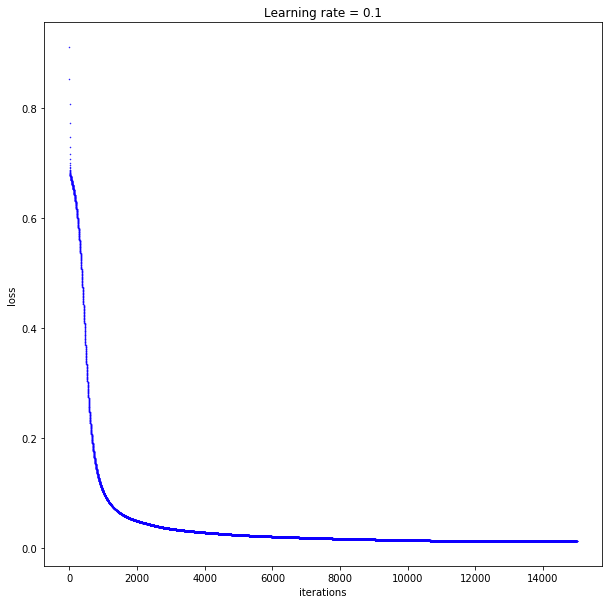

In [19]:
loss = model.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.1')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

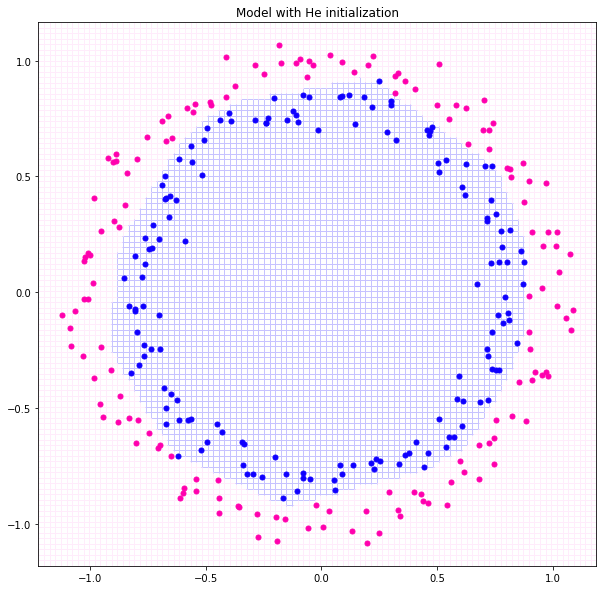

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_title('Model with He initialization') 

u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')